## Missing Values

In [237]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style('darkgrid')
import re

import warnings
warnings.filterwarnings('ignore')

In [238]:
df0 = pd.read_csv('df_clean.csv')
df = df0.copy()

In [239]:
df

,short_description,body_type,price,vat,km,hp_kw,type,previous_owners,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,make,model,first_registration,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement_in_cc,cylinders,weight,drive_chain,fuel,co2/km(comb)_emission_in_g,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,fuel_type,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km)
0,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,66.0,Used,2.0,06/2021,Yes,NaN,NaN,NaN,Audi,A1,2016.0,Black,Metallic,Mythosschwarz,5.0,5.0,0588/BDF,Automatic,1422.0,3.0,1220.0,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Sicherheit:', ' ', 'Deaktivierung für B...",NaN,NaN,NaN,NaN,NaN,Diesel (Particulate Filter),Cloth,3.8,4.3,3.5
1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,141.0,Used,NaN,NaN,NaN,NaN,NaN,NaN,Audi,A1,2017.0,Red,NaN,NaN,3.0,4.0,0588/BCY,Automatic,1798.0,4.0,1255.0,front,Gasoline,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",'\nLangstreckenfahrzeug daher die hohe Kilomet...,['\n4 (Green)\n'],7.0,NaN,NaN,NaN,Gasoline,Cloth,5.6,7.0,4.7
2,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,85.0,Used,1.0,NaN,NaN,NaN,NaN,NaN,Audi,A1,2016.0,Black,Metallic,mythosschwarz metallic,4.0,4.0,NaN,Automatic,1598.0,NaN,NaN,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Fahrzeug-Nummer: AM-95365', ' ', 'Ehem....",['\n4 (Green)\n'],NaN,NaN,NaN,NaN,Diesel (Particulate Filter),Cloth,3.8,4.4,3.4
3,1.4 TDi Design S tronic,Sedans,14500,NaN,73000.0,66.0,Used,1.0,NaN,NaN,NaN,99 g CO2/km (comb),Euro 6,Audi,A1,2016.0,Brown,Metallic,NaN,3.0,4.0,NaN,Automatic,1422.0,3.0,1195.0,NaN,Diesel (Particulate Filter),99.0,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","'\nAudi A1: ', '- 1e eigenaar ', '- Perfecte s...",NaN,6.0,NaN,NaN,NaN,Diesel (Particulate Filter),NaN,3.8,4.3,3.5
4,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,NaN,16200.0,66.0,Used,1.0,NaN,Yes,NaN,4 (Green),NaN,Audi,A1,2016.0,Black,Metallic,Mythosschwarz Metallic,5.0,5.0,0588/BDF,Automatic,1422.0,3.0,NaN,front,Diesel (Particulate Filter),109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","'\n', 'Technik & Sicherheit:', 'Xenon plus', '...",NaN,NaN,Germany,NaN,NaN,Diesel (Particulate Filter),Cloth,4.0,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,NaN,147.0,New,NaN,NaN,NaN,24.0,NaN,NaN,Renault,Espace,NaN,Grey,Metallic,Grigio scuro,5.0,5.0,NaN,Automatic,1997.0,4.0,1758.0,front,Diesel (Particulate Filter),139.0,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",'\

In [240]:
df.head(6)

,short_description,body_type,price,vat,km,hp_kw,type,previous_owners,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,make,model,first_registration,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement_in_cc,cylinders,weight,drive_chain,fuel,co2/km(comb)_emission_in_g,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,fuel_type,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km)
0,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,66.0,Used,2.0,06/2021,Yes,NaN,NaN,NaN,Audi,A1,2016.0,Black,Metallic,Mythosschwarz,5.0,5.0,0588/BDF,Automatic,1422.0,3.0,1220.0,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Sicherheit:', ' ', 'Deaktivierung für B...",NaN,NaN,NaN,NaN,NaN,Diesel (Particulate Filter),Cloth,3.8,4.3,3.5
1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,141.0,Used,NaN,NaN,NaN,NaN,NaN,NaN,Audi,A1,2017.0,Red,NaN,NaN,3.0,4.0,0588/BCY,Automatic,1798.0,4.0,1255.0,front,Gasoline,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",'\nLangstreckenfahrzeug daher die hohe Kilomet...,['\n4 (Green)\n'],7.0,NaN,NaN,NaN,Gasoline,Cloth,5.6,7.0,4.7
2,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,85.0,Used,1.0,NaN,NaN,NaN,NaN,NaN,Audi,A1,2016.0,Black,Metallic,mythosschwarz metallic,4.0,4.0,NaN,Automatic,1598.0,NaN,NaN,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Fahrzeug-Nummer: AM-95365', ' ', 'Ehem....",['\n4 (Green)\n'],NaN,NaN,NaN,NaN,Diesel (Particulate Filter),Cloth,3.8,4.4,3.4
3,1.4 TDi Design S tronic,Sedans,14500,NaN,73000.0,66.0,Used,1.0,NaN,NaN,NaN,99 g CO2/km (comb),Euro 6,Audi,A1,2016.0,Brown,Metallic,NaN,3.0,4.0,NaN,Automatic,1422.0,3.0,1195.0,NaN,Diesel (Particulate Filter),99.0,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","'\nAudi A1: ', '- 1e eigenaar ', '- Perfecte s...",NaN,6.0,NaN,NaN,NaN,Diesel (Particulate Filter),NaN,3.8,4.3,3.5
4,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,NaN,16200.0,66.0,Used,1.0,NaN,Yes,NaN,4 (Green),NaN,Audi,A1,2016.0,Black,Metallic,Mythosschwarz Metallic,5.0,5.0,0588/BDF,Automatic,1422.0,3.0,NaN,front,Diesel (Particulate Filter),109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","'\n', 'Technik & Sicherheit:', 'Xenon plus', '...",NaN,NaN,Germany,NaN,NaN,Diesel (Particulate Filter),Cloth,4.0,4.6,3.8
5,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sedans,15090,NaN,63668.0,85.0,Used,1.0,NaN,NaN,NaN,92 g CO2/km (comb),Euro 6,Audi,A1,2016.0,White,Metallic,NaN,4.0,5.0,NaN,Automatic,1598.0,NaN,NaN,NaN,Diesel (Particulate Filter),9.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",'\nSichern Sie sich diesen Audi A1 1.6 TDI Spo...,['\n4 (Green)\n'],NaN,Germany,NaN,NaN,Diesel (Particulate Filter),Part leather,3.5,4.3,3.0


In [241]:
df[df.duplicated(keep=False)].T

,5,19,81,133,136,197,201,228,231,291,292,293,294,295,296,297,298,300,302,311,312,313,314,315,316,317,318,...,15570,15571,15574,15575,15576,15577,15578,15579,15584,15600,15601,15634,15635,15639,15758,15760,15761,15762,15778,15788,15789,15795,15798,15879,15881,15882,15888
short_description,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sportback 1.6 TDI 116 CV S tronic Metal plus,Sportback 1.6 TDI 116 CV S tronic Metal plus,Sportback 1.0 TFSI Sport S tronic *PDC*SHZ*KLIMA*,Sportback 1.0 TFSI Sport S tronic *PDC*SHZ*KLIMA*,Sportback 1.0 TFSI 95 CV S tronic Admired,Sportback 1.0 TFSI 95 CV S tronic Admired,Sportback 1.4 TFSI Attraction S Tronic 9,Sportback 1.4 TFSI Attraction S Tronic 9,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,...,dCi 160CV EDC Energy Intens,dCi 160CV EDC Energy Intens,INTENS Energy dCi 160 EDC,INTENS Energy dCi 160 EDC,INTENS Energy dCi 160 EDC,INTENS Energy dCi 160 EDC,INTENS Energy dCi 160 EDC,INTENS Energy dCi 160 EDC,Limited TCe 225 EDC,2019 LIMITED TCe 225 EDC *PRÄMIE* SHZ PDC Lede...,2019 LIMITED TCe 225 EDC *PRÄMIE* SHZ PDC Lede...,1.8 TCe 225 EDC Intens 7-S CruisingPCityP,1.8 TCe 225 EDC Intens 7-S CruisingPCityP,1.8 TCe 225 EDC Intens 7-S CruisingPCityP,EXECUTIVE Energy dCi 160 EDC,EXECUTIVE Energy dCi 160 EDC,EXECUTIVE Energy dCi 160 EDC,EXECUTIVE Energy dCi 160 EDC,EXECUTIVE Energy dCi 160 EDC,1.6 dCi 160 CV EDC Energy Executive,1.6 dCi 160 CV EDC Energy Executive,EXECUTIVE Energy dCi 160 EDC,V 1.8 TCe 225 EDC Initiale Paris,INITIALE PARIS TCe 225 EDC GPF,INITIALE PARIS TCe 225 EDC GPF,V 1.8 TCe 225 EDC Initiale Paris,INITIALE PARIS TCe 225 EDC GPF
body_type,Sedans,Sedans,Sedans,Compact,Compact,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Other,Other,Van,Van,Van,Van,Van,Van
price,15090,18500,18500,18333,18333,17900,17900,16500,16500,15090,15090,15090,15090,15090,15090,15090,15090,15090,15090,15090,15090,15090,15090,15090,15090,15090,15090,...,31900,31900,31900,31900,31900,31900,31900,31900,31890,30965,30965,29385,29385,29385,34200,34200,34200,34200,34200,34000,34000,34200,40970,47990,47990,40970,47990
vat,NaN,VAT deductible,VAT deductible,VAT deductible,VAT deductible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,NaN,NaN,NaN,NaN,NaN,VAT deductible,VAT deductible,NaN,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible
km,63668.0,13406.0,13406.0,4800.0,4800.0,63136.0,63136.0,25000.0,25000.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,63668.0,...,47.0,47.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,11.0,11.0,21123.0,21123.0,21123.0,1.0,1.0,1.0,1.0,1.0,15000.0,15000.0,1.0,10.0,NaN,NaN,10.0,NaN
hp_kw,85.0,85.0,85.0,70.0,70.0,70.0,70.0,92.0,92.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,...,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,165.0,165.0,165.0,165.0,165.0,165.0,118.0,

In [242]:
df[df.duplicated()]

,short_description,body_type,price,vat,km,hp_kw,type,previous_owners,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,make,model,first_registration,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement_in_cc,cylinders,weight,drive_chain,fuel,co2/km(comb)_emission_in_g,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,fuel_type,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km)
81,Sportback 1.6 TDI 116 CV S tronic Metal plus,Sedans,18500,VAT deductible,13406.0,85.0,Used,NaN,NaN,NaN,NaN,NaN,NaN,Audi,A1,2018.0,Black,Metallic,Nero mythos / grigio daytona,5.0,5.0,NaN,Automatic,1598.0,4.0,NaN,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Armrest,Auxiliary heating,Ele...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Shift paddles...","Alarm system,Central door lock,Daytime running...","'\nOFFERTA N. 4709', 'VETTURA AZIENDALE UFFICI...",['\n1 (No sticker)\n'],7.0,NaN,NaN,NaN,Diesel (Particulate Filter),Cloth,3.8,4.6,3.3
136,Sportback 1.0 TFSI Sport S tronic *PDC*SHZ*KLIMA*,Compact,18333,VAT deductible,4800.0,70.0,Employee's car,1.0,NaN,Yes,NaN,4 (Green),NaN,Audi,A1,2018.0,Black,NaN,Brillantschwarz,4.0,4.0,0588/BCV,Automatic,999.0,NaN,1165.0,front,Super 95,10.0,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Highlights: ', 'Qualitätssiegel GW:plus...",NaN,NaN,Germany,NaN,NaN,Super 95,Cloth,4.4,5.4,3.8
201,Sportback 1.0 TFSI 95 CV S tronic Admired,Sedans,17900,NaN,63136.0,70.0,Used,NaN,NaN,NaN,NaN,NaN,NaN,Audi,A1,2016.0,Grey,NaN,Grigio daytona,5.0,4.0,NaN,Automatic,999.0,3.0,NaN,front,Super 95,10.0,Euro 6,"Air conditioning,Auxiliary heating,Electrical ...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","Adaptive headlights,Central door lock,Daytime ...","'\nOFFERTA N. 4719', ' ', ' VETTURA UFFICIALE ...",['\n1 (No sticker)\n'],7.0,NaN,NaN,NaN,Super 95,Other,4.4,5.4,3.8
231,Sportback 1.4 TFSI Attraction S Tronic 9,Sedans,16500,NaN,25000.0,92.0,Used,NaN,NaN,NaN,24.0,NaN,NaN,Audi,A1,2016.0,Brown,Metallic,Marrón,5.0,5.0,NaN,Automatic,1395.0,4.0,1660.0,NaN,Gasoline,11.0,Euro 6,"Air conditioning,Automatic climate control,Nav...",Radio,NaN,"ABS,Central door lock,Daytime running lights,D...",'\nColor: MarrÃ³n Soho metalizado | Interior: ...,NaN,7.0,NaN,NaN,NaN,Gasoline,NaN,4.9,6.2,4.2
291,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sedans,15090,NaN,63668.0,85.0,Used,1.0,NaN,NaN,NaN,92 g CO2/km (comb),Euro 6,Audi,A1,2016.0,White,Metallic,NaN,4.0,5.0,NaN,Automatic,1598.0,NaN,NaN,NaN,Diesel (Particulate Filter),9.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",'\nSichern Sie sich diesen Audi A1 1.6 TDI Spo...,['\n4 (Green)\n'],NaN,Germany,NaN,NaN,Diesel (Particulate Filter),Part leather,3.5,4.3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15789,1.6 dCi 160 CV EDC Energy Executive,Other,34000,VAT deductible,15000.0,118.0,Used,NaN,NaN,NaN,NaN,NaN,NaN,Renault,Espace,2018.0,White,Uni/basic,Bianco,5.0,5.0,NaN,Automatic,1598.0,4.0,1809.0,front,Diesel (Particulate Filter),120.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer,Radio",Touch screen,"ABS,Central door lock,Daytime running lights,D...",'\n(Rif.15989) - PASSAGGIO DI PROPRIETA ESCLUS...,NaN,6.0,NaN,NaN,NaN,Diesel (Particulate Fil

In [243]:
df[df['short_description']=='1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*']

,short_description,body_type,price,vat,km,hp_kw,type,previous_owners,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,make,model,first_registration,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement_in_cc,cylinders,weight,drive_chain,fuel,co2/km(comb)_emission_in_g,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,fuel_type,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km)
5,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sedans,15090,NaN,63668.0,85.0,Used,1.0,NaN,NaN,NaN,92 g CO2/km (comb),Euro 6,Audi,A1,2016.0,White,Metallic,NaN,4.0,5.0,NaN,Automatic,1598.0,NaN,NaN,NaN,Diesel (Particulate Filter),9.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",'\nSichern Sie sich diesen Audi A1 1.6 TDI Spo...,['\n4 (Green)\n'],NaN,Germany,NaN,NaN,Diesel (Particulate Filter),Part leather,3.5,4.3,3.0
287,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sedans,15090,NaN,63668.0,85.0,Used,1.0,NaN,NaN,NaN,Euro 6,4 (Green),Audi,A1,2016.0,White,Metallic,NaN,4.0,5.0,NaN,Automatic,1598.0,NaN,NaN,NaN,Diesel (Particulate Filter),9.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",'\nSichern Sie sich diesen Audi A1 1.6 TDI Spo...,NaN,NaN,Germany,NaN,NaN,Diesel (Particulate Filter),Part leather,3.5,4.3,3.0
291,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sedans,15090,NaN,63668.0,85.0,Used,1.0,NaN,NaN,NaN,92 g CO2/km (comb),Euro 6,Audi,A1,2016.0,White,Metallic,NaN,4.0,5.0,NaN,Automatic,1598.0,NaN,NaN,NaN,Diesel (Particulate Filter),9.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",'\nSichern Sie sich diesen Audi A1 1.6 TDI Spo...,['\n4 (Green)\n'],NaN,Germany,NaN,NaN,Diesel (Particulate Filter),Part leather,3.5,4.3,3.0
292,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sedans,15090,NaN,63668.0,85.0,Used,1.0,NaN,NaN,NaN,92 g CO2/km (comb),Euro 6,Audi,A1,2016.0,White,Metallic,NaN,4.0,5.0,NaN,Automatic,1598.0,NaN,NaN,NaN,Diesel (Particulate Filter),9.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",'\nSichern Sie sich diesen Audi A1 1.6 TDI Spo...,['\n4 (Green)\n'],NaN,Germany,NaN,NaN,Diesel (Particulate Filter),Part leather,3.5,4.3,3.0
293,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sedans,15090,NaN,63668.0,85.0,Used,1.0,NaN,NaN,NaN,92 g CO2/km (comb),Euro 6,Audi,A1,2016.0,White,Metallic,NaN,4.0,5.0,NaN,Automatic,1598.0,NaN,NaN,NaN,Diesel (Particulate Filter),9.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",'\nSichern Sie sich diesen Audi A1 1.6 TDI Spo...,['\n4 (Green)\n'],NaN,Germany,NaN,NaN,Diesel (Particulate Filter),Part leather,3.5,4.3,3.0
294,1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sedans,15090,NaN,63668.0,85.0,Used,1.0,NaN,NaN,NaN,92 g CO2/km (comb),Euro 6,Audi,A1,2016.0,White,Metallic,NaN,4.0,5.0,NaN,Automatic,1598.0,NaN,NaN,NaN,Diesel (Particulate Filter),9.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",'\n

In [244]:
df = df.drop_duplicates()

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14821 entries, 0 to 15918
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   short_description              14777 non-null  object 
 1   body_type                      14773 non-null  object 
 2   price                          14821 non-null  int64  
 3   vat                            10768 non-null  object 
 4   km                             13897 non-null  float64
 5   hp_kw                          14736 non-null  float64
 6   type                           14819 non-null  object 
 7   previous_owners                8767 non-null   float64
 8   next_inspection                3402 non-null   object 
 9   inspection_new                 3758 non-null   object 
 10  warranty_in_months             4460 non-null   float64
 11  full_service                   5800 non-null   object 
 12  non_smoking_vehicle            2993 non-null  

In [246]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

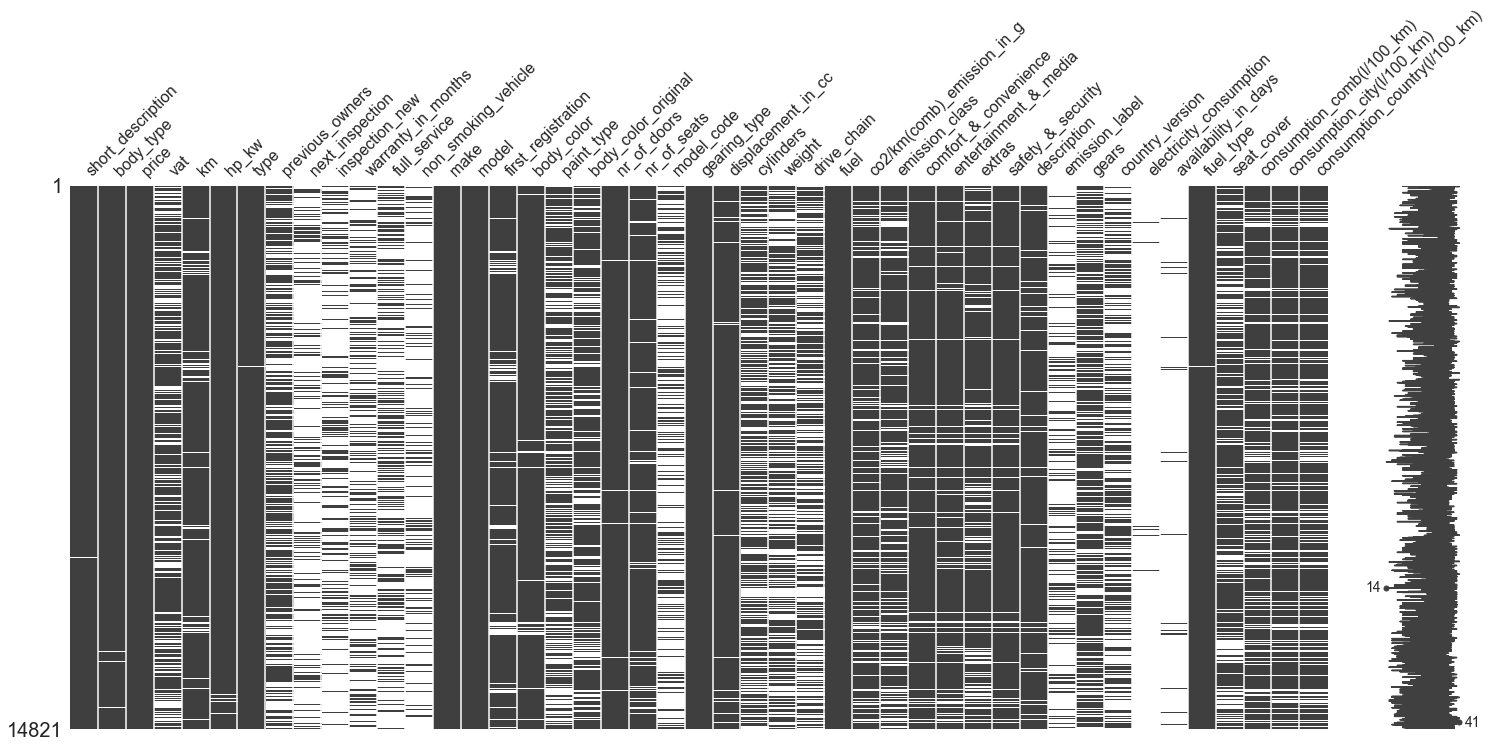

In [247]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

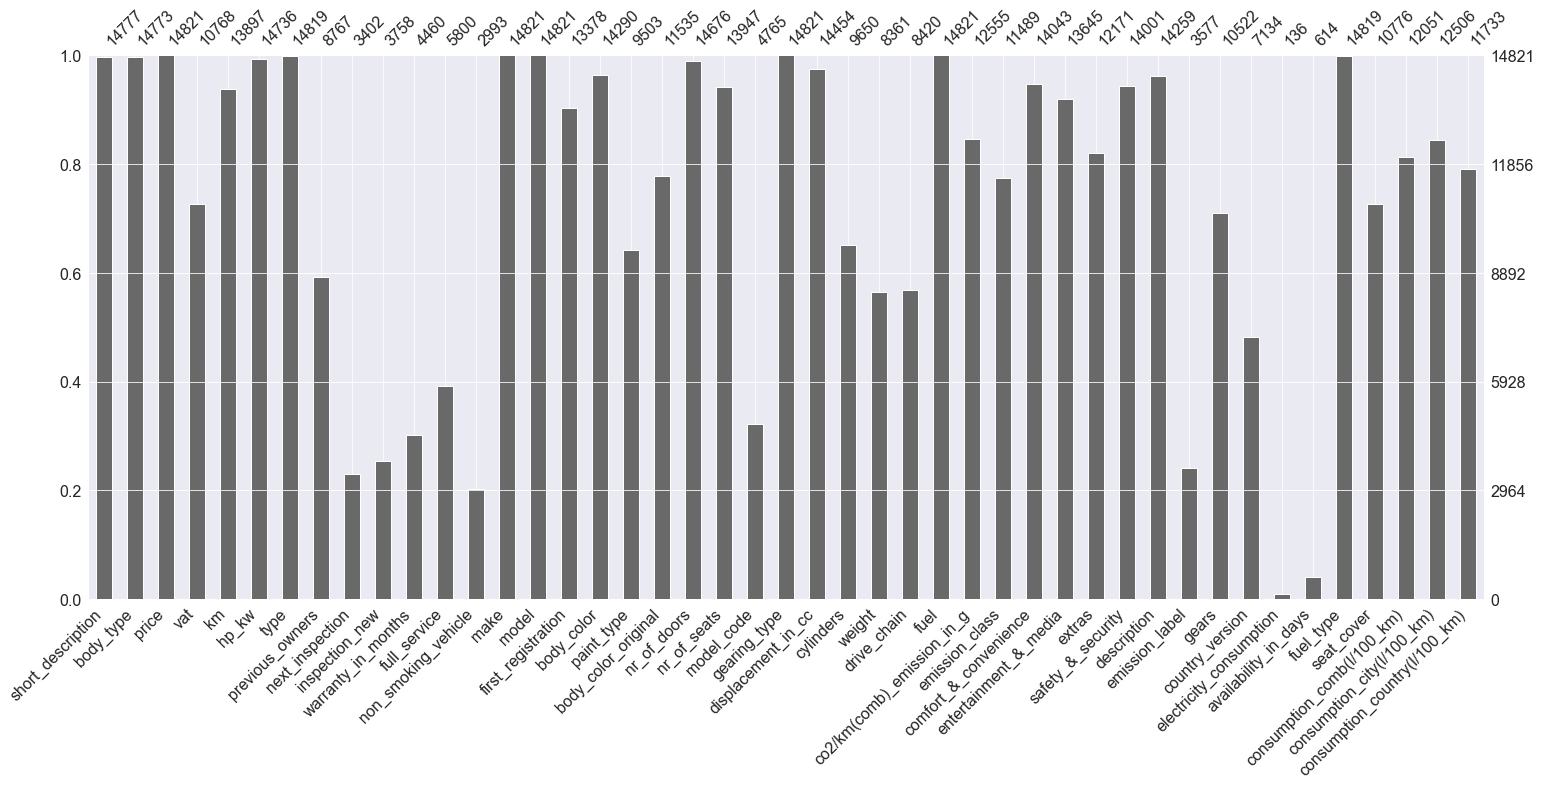

In [248]:
msno.bar(df)

In [249]:
df.loc[:,]

,short_description,body_type,price,vat,km,hp_kw,type,previous_owners,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,make,model,first_registration,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement_in_cc,cylinders,weight,drive_chain,fuel,co2/km(comb)_emission_in_g,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,fuel_type,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km)
0,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,66.0,Used,2.0,06/2021,Yes,NaN,NaN,NaN,Audi,A1,2016.0,Black,Metallic,Mythosschwarz,5.0,5.0,0588/BDF,Automatic,1422.0,3.0,1220.0,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Sicherheit:', ' ', 'Deaktivierung für B...",NaN,NaN,NaN,NaN,NaN,Diesel (Particulate Filter),Cloth,3.8,4.3,3.5
1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,141.0,Used,NaN,NaN,NaN,NaN,NaN,NaN,Audi,A1,2017.0,Red,NaN,NaN,3.0,4.0,0588/BCY,Automatic,1798.0,4.0,1255.0,front,Gasoline,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",'\nLangstreckenfahrzeug daher die hohe Kilomet...,['\n4 (Green)\n'],7.0,NaN,NaN,NaN,Gasoline,Cloth,5.6,7.0,4.7
2,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,85.0,Used,1.0,NaN,NaN,NaN,NaN,NaN,Audi,A1,2016.0,Black,Metallic,mythosschwarz metallic,4.0,4.0,NaN,Automatic,1598.0,NaN,NaN,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Fahrzeug-Nummer: AM-95365', ' ', 'Ehem....",['\n4 (Green)\n'],NaN,NaN,NaN,NaN,Diesel (Particulate Filter),Cloth,3.8,4.4,3.4
3,1.4 TDi Design S tronic,Sedans,14500,NaN,73000.0,66.0,Used,1.0,NaN,NaN,NaN,99 g CO2/km (comb),Euro 6,Audi,A1,2016.0,Brown,Metallic,NaN,3.0,4.0,NaN,Automatic,1422.0,3.0,1195.0,NaN,Diesel (Particulate Filter),99.0,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","'\nAudi A1: ', '- 1e eigenaar ', '- Perfecte s...",NaN,6.0,NaN,NaN,NaN,Diesel (Particulate Filter),NaN,3.8,4.3,3.5
4,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,NaN,16200.0,66.0,Used,1.0,NaN,Yes,NaN,4 (Green),NaN,Audi,A1,2016.0,Black,Metallic,Mythosschwarz Metallic,5.0,5.0,0588/BDF,Automatic,1422.0,3.0,NaN,front,Diesel (Particulate Filter),109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","'\n', 'Technik & Sicherheit:', 'Xenon plus', '...",NaN,NaN,Germany,NaN,NaN,Diesel (Particulate Filter),Cloth,4.0,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,NaN,147.0,New,NaN,NaN,NaN,24.0,NaN,NaN,Renault,Espace,NaN,Grey,Metallic,Grigio scuro,5.0,5.0,NaN,Automatic,1997.0,4.0,1758.0,front,Diesel (Particulate Filter),139.0,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",'\

In [250]:
df[df['km'].isna()]

,short_description,body_type,price,vat,km,hp_kw,type,previous_owners,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,make,model,first_registration,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement_in_cc,cylinders,weight,drive_chain,fuel,co2/km(comb)_emission_in_g,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,fuel_type,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km)
743,SPB 30 TFSI S tronic Admired,Sedans,25900,NaN,NaN,85.0,New,0.0,NaN,NaN,NaN,NaN,NaN,Audi,A1,NaN,Black,NaN,NaN,5.0,4.0,NaN,Semi-automatic,999.0,3.0,1255.0,front,Gasoline,108.0,Euro 6d-TEMP,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport suspension,Touch screen,Tun...","ABS,Alarm system,Central door lock,Central doo...","'\n', 'NUOVA AUDI A1! VETTURA UFFICIALE ITA IN...",NaN,7.0,Italy,NaN,NaN,Gasoline,Cloth,4.8,5.8,4.2
869,SPBK 30 TFSI 1.0 S-tronic 116cv MY'19,Sedans,21300,VAT deductible,NaN,85.0,New,0.0,NaN,NaN,24.0,NaN,NaN,Audi,A1,NaN,White,NaN,Bianco Cortina,5.0,4.0,NaN,Automatic,999.0,3.0,1165.0,front,Gasoline,10.0,Euro 6,"Air conditioning,Power windows",Radio,Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...","'\nAirbag anteriori e laterali per la testa, C...",NaN,7.0,Italy,NaN,NaN,Gasoline,NaN,4.4,5.4,3.8
946,Sportback 35 TFSI S tronic,Compact,21406,NaN,NaN,110.0,New,NaN,NaN,NaN,NaN,NaN,NaN,Audi,A1,NaN,NaN,NaN,NaN,5.0,5.0,NaN,Automatic,1498.0,4.0,1180.0,front,Gasoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,Gasoline,NaN,5.0,6.0,3.0
977,1.0 30 TFSI Sportback Advanced,Compact,21200,VAT deductible,NaN,85.0,New,NaN,NaN,NaN,NaN,NaN,Euro 6d-TEMP,Audi,A1,NaN,White,NaN,Cortinaweiß,4.0,4.0,0588/BHM,Automatic,999.0,NaN,NaN,NaN,Super 95,110.0,Euro 6d-TEMP,"Air conditioning,Electrical side mirrors,Light...","Bluetooth,Hands-free equipment,Radio,USB",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...","'\n- über 50 Jahren Opel - Partner', '- Vertra...",['\n4 (Green)\n'],NaN,Denmark,NaN,180.0,Super 95,Cloth,4.8,5.9,4.2
980,30 Tfsi NOLEGGIO LUNGO TERMINE MINIMO 24 MESI,Compact,21100,NaN,NaN,85.0,New,0.0,NaN,NaN,NaN,NaN,NaN,Audi,A1,NaN,Yellow,Metallic,NaN,5.0,5.0,NaN,Automatic,NaN,4.0,NaN,front,Gasoline,NaN,NaN,"Air conditioning,Heads-up display,Power window...",Radio,Alloy wheels,"ABS,Alarm system,Central door lock,Driver-side...","'\n', '""X-STYLE l’alternativa di successo""', '...",NaN,6.0,Italy,NaN,NaN,Gasoline,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15890,BLUE dCi 200 EDC LIMITED,Station wagon,42490,VAT deductible,NaN,147.0,New,NaN,NaN,NaN,NaN,NaN,NaN,Renault,Espace,NaN,Black,NaN,NaN,5.0,6.0,NaN,Automatic,1997.0,4.0,1840.0,front,Diesel (Particulate Filter),168.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...","'\n', 'Wir freuen uns über Ihr Interesse am hi...",['\n4 (Green)\n'],6.0,Germany,NaN,90.0,Diesel (Particulate Filter),Cloth,5.7,6.0,5.3
15902,BLUE dCi 200 EDC Initiale Paris,Sedans,41043,VAT deductible,NaN,147.0,New,NaN,NaN,NaN,NaN,NaN,139 g CO2/km (comb),Renault,Espace,NaN,Black,NaN,GNE Noir Etoile,4.0,5.0,3333/BDR,Automatic,1997.0,NaN,NaN,NaN,Diesel (Particulate Filter),139.0,Euro 6c,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Touch screen,Voice Control","ABS,Blind spot monitor,Central door lock,Dayti...","'\n12V Anschluss, 19"" Leichtmetallfelgen, ABS,...",NaN,NaN,Belgium,NaN,NaN,Diesel (Particulate Filte

In [251]:
df['age'] = df['first_registration'].apply(lambda x: 2020-x) 

In [252]:
df['age'].value_counts(dropna=False)

2.0    4362
4.0    3399
3.0    2971
1.0    2646
NaN    1443
Name: age, dtype: int64

In [253]:
df.drop('first_registration', axis=1, inplace=True)

In [254]:
df.columns

Index(['short_description', 'body_type', 'price', 'vat', 'km', 'hp_kw', 'type',
       'previous_owners', 'next_inspection', 'inspection_new',
       'warranty_in_months', 'full_service', 'non_smoking_vehicle', 'make',
       'model', 'body_color', 'paint_type', 'body_color_original',
       'nr_of_doors', 'nr_of_seats', 'model_code', 'gearing_type',
       'displacement_in_cc', 'cylinders', 'weight', 'drive_chain', 'fuel',
       'co2/km(comb)_emission_in_g', 'emission_class', 'comfort_&_convenience',
       'entertainment_&_media', 'extras', 'safety_&_security', 'description',
       'emission_label', 'gears', 'country_version', 'electricity_consumption',
       'availability_in_days', 'fuel_type', 'seat_cover',
       'consumption_comb(l/100_km)', 'consumption_city(l/100_km)',
       'consumption_country(l/100_km)', 'age'],
      dtype='object')

In [255]:
new_columns = ['make', 'model', 'age', 'short_description', 'body_type', 'price', 'km', 'hp_kw','fuel_type', 'fuel', 'type',
       'previous_owners', 'gearing_type', 'displacement_in_cc', 'cylinders', 'weight',  'emission_class', 'next_inspection', 'inspection_new',
       'warranty_in_months', 'full_service', 'non_smoking_vehicle', 
        'body_color', 'paint_type', 'body_color_original',
       'nr_of_doors', 'nr_of_seats', 'model_code',
       'drive_chain',
       'co2/km(comb)_emission_in_g', 'comfort_&_convenience',
       'entertainment_&_media', 'extras', 'safety_&_security', 'description',
       'emission_label', 'gears', 'country_version', 'electricity_consumption',
       'availability_in_days', 'seat_cover',
       'consumption_comb(l/100_km)', 'consumption_city(l/100_km)',
       'consumption_country(l/100_km)', 'vat']

In [256]:
df = df.reindex(columns=new_columns)

In [257]:
df.head()

,make,model,age,short_description,body_type,price,km,hp_kw,fuel_type,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
0,Audi,A1,4.0,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,56013.0,66.0,Diesel (Particulate Filter),Diesel (Particulate Filter),Used,2.0,Automatic,1422.0,3.0,1220.0,Euro 6,06/2021,Yes,NaN,NaN,NaN,Black,Metallic,Mythosschwarz,5.0,5.0,0588/BDF,front,99.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Sicherheit:', ' ', 'Deaktivierung für B...",NaN,NaN,NaN,NaN,NaN,Cloth,3.8,4.3,3.5,VAT deductible
1,Audi,A1,3.0,1.8 TFSI sport,Sedans,14500,80000.0,141.0,Gasoline,Gasoline,Used,NaN,Automatic,1798.0,4.0,1255.0,Euro 6,NaN,NaN,NaN,NaN,NaN,Red,NaN,NaN,3.0,4.0,0588/BCY,front,129.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",'\nLangstreckenfahrzeug daher die hohe Kilomet...,['\n4 (Green)\n'],7.0,NaN,NaN,NaN,Cloth,5.6,7.0,4.7,Price negotiable
2,Audi,A1,4.0,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,83450.0,85.0,Diesel (Particulate Filter),Diesel (Particulate Filter),Used,1.0,Automatic,1598.0,NaN,NaN,Euro 6,NaN,NaN,NaN,NaN,NaN,Black,Metallic,mythosschwarz metallic,4.0,4.0,NaN,front,99.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Fahrzeug-Nummer: AM-95365', ' ', 'Ehem....",['\n4 (Green)\n'],NaN,NaN,NaN,NaN,Cloth,3.8,4.4,3.4,VAT deductible
3,Audi,A1,4.0,1.4 TDi Design S tronic,Sedans,14500,73000.0,66.0,Diesel (Particulate Filter),Diesel (Particulate Filter),Used,1.0,Automatic,1422.0,3.0,1195.0,Euro 6,NaN,NaN,NaN,99 g CO2/km (comb),Euro 6,Brown,Metallic,NaN,3.0,4.0,NaN,NaN,99.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","'\nAudi A1: ', '- 1e eigenaar ', '- Perfecte s...",NaN,6.0,NaN,NaN,NaN,NaN,3.8,4.3,3.5,NaN
4,Audi,A1,4.0,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,16200.0,66.0,Diesel (Particulate Filter),Diesel (Particulate Filter),Used,1.0,Automatic,1422.0,3.0,NaN,Euro 6,NaN,Yes,NaN,4 (Green),NaN,Black,Metallic,Mythosschwarz Metallic,5.0,5.0,0588/BDF,front,109.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","'\n', 'Technik & Sicherheit:', 'Xenon plus', '...",NaN,NaN,Germany,NaN,NaN,Cloth,4.0,4.6,3.8,NaN


In [258]:
df[df['age'].isna()][['make', 'model', 'age', 'short_description', 'price', 'km']]

,make,model,age,short_description,price,km
122,Audi,A1,NaN,Sportback basis 30 TFSI 116 S tronic Euro6d-Te...,18730,1.0
710,Audi,A1,NaN,Sportback,31990,10.0
734,Audi,A1,NaN,SPB 30 TFSI S tronic S line edition,30000,0.0
741,Audi,A1,NaN,Advanced,28290,5.0
743,Audi,A1,NaN,SPB 30 TFSI S tronic Admired,25900,NaN
...,...,...,...,...,...,...
15896,Renault,Espace,NaN,"Initiale Paris 1,6 dCI 118 kW",41900,5000.0
15902,Renault,Espace,NaN,BLUE dCi 200 EDC Initiale Paris,41043,NaN
15907,Renault,Espace,NaN,"1.8 TCE 225 INITIALE PARIS, WINTER-, CRUISING-...",39990,50.0
15912,Renault,Espace,NaN,Blue dCi 200CV EDC Executive 4Control,39950,NaN


In [259]:
df.groupby(['make', 'model', 'age']).km.describe()

count          mean           std      min       25%  \
make    model    age                                                         
Audi    A1       1.0  446.0   2635.681614   3475.013159      1.0     12.75   
                 2.0  725.0  13829.939310   7919.201235      1.0   7478.00   
                 3.0  398.0  26437.198492  19248.334287     10.0  13827.00   
                 4.0  573.0  54252.322862  27392.979258   3150.0  33991.00   
        A2       2.0    1.0  26166.000000           NaN  26166.0  26166.00   
        A3       1.0  428.0   2354.042056   8077.903949      1.0     10.00   
                 2.0  749.0  18377.425901  11196.815101      1.0  11021.00   
                 3.0  654.0  44059.555046  27658.445868     15.0  25000.00   
                 4.0  772.0  89091.830311  36901.895135     35.0  61866.25   
Opel    Astra    1.0  418.0   2993.784689   5620.976236      1.0     10.00   
                 2.0  704.0  21230.340909  10562.885355      5.0  14000.00   
                 3.0  482.0  53799.989627  30661.708466     30.0  30743.75   
                 4.0  502.0  89210.406375  42578.315635  10027.0  57695.75   
        Corsa    1.0  497.0   1182.877264   4060.065182      1.0     10.00   
                 2.0  678.0  17384.837758  11774.061118      5.0   8313.75   
                 3.0  367.0  39470.343324  25815.682075     99.0  20807.50   
                 4.0  394.0  58093.802030  33451.456066   1800.0  33475.00   
        Insignia 1.0  286.0   3597.423077   4666.249885      1.0     67.00   
                 2.0  732.0  22322.931694   7964.048176      1.0  16736.75   
                 3.0  554.0  47846.525271  32846.219144      1.0  22910.00   
                 4.0  539.0  94517.382189  41031.272050  10791.0  65247.50   
Renault Clio     1.0  226.0    828.336283   7096.601985      1.0     10.00   
                 2.0  516.0  16097.492248  13504.379328      1.0   5500.00   
                 3.0  374.0  36075.764706  19752.247168     20.0  22800.00   
                 4.0  344.0  67796.375000  35161.100215     10.0  39814.00   
        Duster   1.0   16.0    101.000000      0.000000    101.0    101.00   
        Espace   1.0  187.0   1858.925134   3853.831033      1.0     10.00   
                 2.0  223.0  14519.896861  11074.144881      1.0   5695.50   
                 3.0  141.0  39904.808511  29265.710911      1.0  20862.00   
                 4.0  275.0  73651.461818  34947.531623   3532.0  48250.00   

                          50%        75%       max  
make    model    age                                
Audi    A1       1.0   1000.0    4500.00   18000.0  
                 2.0  12415.0   20050.00   47000.0  
                 3.0  21421.5   33283.75  148257.0  
                 4.0  50000.0   67278.00  192000.0  
        A2       2.0  26166.0   26166.00   26166.0  
        A3       1.0     42.5    2423.75  127022.0  
                 2.0  17985.0   24272.00  136000.0  
                 3.0  36792.0   56000.00  158000.0  
                 4.0  87999.0  114315.75  291800.0  
Opel    Astra    1.0   1000.0    4999.00   88000.0  
                 2.0  21812.5   28155.50   67500.0  
                 3.0  48039.5   71982.25  188000.0  
                 4.0  84950.0  113106.00  260000.0  
        Corsa    1.0     12.0     500.00   76300.0  
                 2.0  16532.0   24500.00   70000.0  
                 3.0  39700.0   53345.00  317000.0  
                 4.0  53000.0   85126.75  179521.0  
        Insignia 1.0   1825.0    5555.00   37500.0  
                 2.0  24125.0   28502.00   70670.0  
                 3.0  33850.0   77037.50  180033.0  
                 4.0  89042.0  118475.00  232000.0  
Renault Clio     1.0     10.0     100.00  105000.0  
                 2.0  14580.5   24473.00  113392.0  
                 3.0  32878.0   46902.50  131494.0  
                 4.0  64551.5   91000.00  163500.0  
        Duster   1.0    101.0     101.00     101.0  
        Espace   1.0     15.0    1530.00 

In [260]:
df[df['age'] == 1.0][['make', 'model', 'age', 'km']]

,make,model,age,km
707,Audi,A1,1.0,1.0
713,Audi,A1,1.0,7000.0
732,Audi,A1,1.0,200.0
736,Audi,A1,1.0,1.0
737,Audi,A1,1.0,50.0
...,...,...,...,...
15913,Renault,Espace,1.0,1000.0
15915,Renault,Espace,1.0,9900.0
15916,Renault,Espace,1.0,15.0
15917,Renault,Espace,1.0,10.0


In [261]:
df[df['age'] == 1.0].groupby(['make', 'model', 'age']).km.describe()

count         mean          std    min     25%     50%  \
make    model    age                                                           
Audi    A1       1.0  446.0  2635.681614  3475.013159    1.0   12.75  1000.0   
        A3       1.0  428.0  2354.042056  8077.903949    1.0   10.00    42.5   
Opel    Astra    1.0  418.0  2993.784689  5620.976236    1.0   10.00  1000.0   
        Corsa    1.0  497.0  1182.877264  4060.065182    1.0   10.00    12.0   
        Insignia 1.0  286.0  3597.423077  4666.249885    1.0   67.00  1825.0   
Renault Clio     1.0  226.0   828.336283  7096.601985    1.0   10.00    10.0   
        Duster   1.0   16.0   101.000000     0.000000  101.0  101.00   101.0   
        Espace   1.0  187.0  1858.925134  3853.831033    1.0   10.00    15.0   

                          75%       max  
make    model    age                     
Audi    A1       1.0  4500.00   18000.0  
        A3       1.0  2423.75  127022.0  
Opel    Astra    1.0  4999.00   88000.0  
        Corsa    1.0   500.00   76300.0  
        Insignia 1.0  5555.00   37500.0  
Renault Clio     1.0   100.00  105000.0  
        Duster   1.0   101.00     101.0  
        Espace   1.0  1530.00   19900.0

In [262]:
df.groupby(['make', 'model', 'age']).km.mean()

make     model     age
Audi     A1        1.0     2635.681614
                   2.0    13829.939310
                   3.0    26437.198492
                   4.0    54252.322862
         A2        2.0    26166.000000
         A3        1.0     2354.042056
                   2.0    18377.425901
                   3.0    44059.555046
                   4.0    89091.830311
Opel     Astra     1.0     2993.784689
                   2.0    21230.340909
                   3.0    53799.989627
                   4.0    89210.406375
         Corsa     1.0     1182.877264
                   2.0    17384.837758
                   3.0    39470.343324
                   4.0    58093.802030
         Insignia  1.0     3597.423077
                   2.0    22322.931694
                   3.0    47846.525271
                   4.0    94517.382189
Renault  Clio      1.0      828.336283
                   2.0    16097.492248
                   3.0    36075.764706
                   4.0    67796.375000
  

In [263]:
df.groupby(['make', 'model', 'age']).km.transform('mean')

0        54252.322862
1        26437.198492
2        54252.322862
3        54252.322862
4        54252.322862
             ...     
15914             NaN
15915     1858.925134
15916     1858.925134
15917     1858.925134
15918     1858.925134
Name: km, Length: 14821, dtype: float64

In [264]:
#df['km'].fillna(df.groupby(['make', 'model'])['km'].transform('mean'), inplace=True)

In [265]:
df.km.value_counts(dropna=False)

NaN       924
10.0      904
1.0       323
5.0       146
50.0      131
         ... 
1794.0      1
5586.0      1
199.0       1
3521.0      1
57.0        1
Name: km, Length: 6690, dtype: int64

In [266]:
#df.loc[df["km"]<=9000, "age"].fillna(1, inplace=True)

In [267]:
#df.loc[df["km"]<=9000, "age"].isna().sum()

In [268]:
df.loc[df["km"]<=9000, "age"].isna().sum()

681

In [269]:
df.loc[df["km"]<=9000, "age"] = df.loc[df["km"]<=9000, "age"].fillna(value=1)

In [270]:
df.loc[df["km"]<=9000, "age"].isna().sum()

0

In [271]:
df.groupby(['age']).km.mean()

age
1.0     1766.783359
2.0    18122.752542
3.0    42215.506397
4.0    77098.861430
Name: km, dtype: float64

In [272]:
df.loc[(df["km"]>=9000) & (df["km"]<=30000), "age"] = df.loc[(df["km"]>=9000) & (df["km"]<=30000), "age"].fillna(value=2)

In [273]:
df.loc[(df["km"]>=9000) & (df["km"]<=30000), "age"].isna().sum()

0

In [274]:
df.loc[(df["km"]>=30000) & (df["km"]<=60000), "age"] = df.loc[(df["km"]>=30000) & (df["km"]<=60000), "age"].fillna(value=3)

In [275]:
df.loc[df["km"]>60000, "age"] = df.loc[df["km"]>60000, "age"].fillna(value=4)

In [276]:
df['age'].value_counts(dropna=False)

2.0    4368
4.0    3404
1.0    3327
3.0    2975
NaN     747
Name: age, dtype: int64

In [277]:
df['km'].value_counts(dropna=False)

NaN       924
10.0      904
1.0       323
5.0       146
50.0      131
         ... 
1794.0      1
5586.0      1
199.0       1
3521.0      1
57.0        1
Name: km, Length: 6690, dtype: int64

In [278]:
df.groupby(['make', 'model', 'age']).km.transform('mean')

0        54252.322862
1        26437.198492
2        54252.322862
3        54252.322862
4        54252.322862
             ...     
15914             NaN
15915     1581.977876
15916     1581.977876
15917     1581.977876
15918     1581.977876
Name: km, Length: 14821, dtype: float64

In [279]:
df.groupby(['make', 'model', 'age']).price.transform('mean')

0        14434.668412
1        16669.723618
2        14434.668412
3        14434.668412
4        14434.668412
             ...     
15914             NaN
15915    40212.064378
15916    40212.064378
15917    40212.064378
15918    40212.064378
Name: price, Length: 14821, dtype: float64

In [280]:
df.groupby(['make', 'model', 'age']).price.mean()

make     model     age
Audi     A1        1.0    23887.876866
                   2.0    18403.136799
                   3.0    16669.723618
                   4.0    14434.668412
         A2        2.0    28200.000000
         A3        1.0    25071.594295
                   2.0    22552.733333
                   3.0    19971.302752
                   4.0    16573.721503
Opel     Astra     1.0    21656.551020
                   2.0    16166.298444
                   3.0    13026.267635
                   4.0    11359.384921
         Corsa     1.0    13632.468750
                   2.0    11323.561119
                   3.0     9254.908356
                   4.0     8233.896203
         Insignia  1.0    33731.259174
                   2.0    21470.170300
                   3.0    17061.539711
                   4.0    13698.483333
Renault  Clio      1.0    12016.301829
                   2.0    14271.049524
                   3.0    10872.050667
                   4.0     9478.831884
  

In [281]:
df.loc[(df["km"].isna()) & (df["age"].isna()), :]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel_type,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
743,Audi,A1,NaN,SPB 30 TFSI S tronic Admired,Sedans,25900,NaN,85.0,Gasoline,Gasoline,New,0.0,Semi-automatic,999.0,3.0,1255.0,Euro 6d-TEMP,NaN,NaN,NaN,NaN,NaN,Black,NaN,NaN,5.0,4.0,NaN,front,108.0,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport suspension,Touch screen,Tun...","ABS,Alarm system,Central door lock,Central doo...","'\n', 'NUOVA AUDI A1! VETTURA UFFICIALE ITA IN...",NaN,7.0,Italy,NaN,NaN,Cloth,4.8,5.8,4.2,NaN
869,Audi,A1,NaN,SPBK 30 TFSI 1.0 S-tronic 116cv MY'19,Sedans,21300,NaN,85.0,Gasoline,Gasoline,New,0.0,Automatic,999.0,3.0,1165.0,Euro 6,NaN,NaN,24.0,NaN,NaN,White,NaN,Bianco Cortina,5.0,4.0,NaN,front,10.0,"Air conditioning,Power windows",Radio,Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...","'\nAirbag anteriori e laterali per la testa, C...",NaN,7.0,Italy,NaN,NaN,NaN,4.4,5.4,3.8,VAT deductible
946,Audi,A1,NaN,Sportback 35 TFSI S tronic,Compact,21406,NaN,110.0,Gasoline,Gasoline,New,NaN,Automatic,1498.0,4.0,1180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,front,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,5.0,6.0,3.0,NaN
977,Audi,A1,NaN,1.0 30 TFSI Sportback Advanced,Compact,21200,NaN,85.0,Super 95,Super 95,New,NaN,Automatic,999.0,NaN,NaN,Euro 6d-TEMP,NaN,NaN,NaN,NaN,Euro 6d-TEMP,White,NaN,Cortinaweiß,4.0,4.0,0588/BHM,NaN,110.0,"Air conditioning,Electrical side mirrors,Light...","Bluetooth,Hands-free equipment,Radio,USB",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...","'\n- über 50 Jahren Opel - Partner', '- Vertra...",['\n4 (Green)\n'],NaN,Denmark,NaN,180.0,Cloth,4.8,5.9,4.2,VAT deductible
980,Audi,A1,NaN,30 Tfsi NOLEGGIO LUNGO TERMINE MINIMO 24 MESI,Compact,21100,NaN,85.0,Gasoline,Gasoline,New,0.0,Automatic,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellow,Metallic,NaN,5.0,5.0,NaN,front,NaN,"Air conditioning,Heads-up display,Power window...",Radio,Alloy wheels,"ABS,Alarm system,Central door lock,Driver-side...","'\n', '""X-STYLE l’alternativa di successo""', '...",NaN,6.0,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15884,Renault,Espace,NaN,TCe 225 EDC GPF INITIALE PARIS,Station wagon,42990,NaN,165.0,Super 95 (Particulate Filter),Super 95 (Particulate Filter),New,NaN,Automatic,1798.0,NaN,NaN,Euro 6d-TEMP,NaN,NaN,NaN,NaN,Euro 6d-TEMP,Grey,Metallic,Titanium-Grau Metallic,4.0,5.0,NaN,NaN,168.0,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...","'\n', ' * 4CONTROL-Schriftzug an der B-Säule',...",NaN,NaN,Germany,NaN,3.0,Full leather,7.4,9.2,6.3,VAT deductible
15890,Renault,Espace,NaN,BLUE dCi 200 EDC LIMITED,Station wagon,42490,NaN,147.0,Diesel (Particulate Filter),Diesel (Particulate Filter),New,NaN,Automatic,1997.0,4.0,1840.0,Euro 6d-TEMP,NaN,NaN,NaN,NaN,NaN,Black,NaN,NaN,5.0,6.0,NaN,front,168.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...","'\n', 'Wir freuen uns über Ihr Interesse am hi...",['\n4 (Green)\n'],6.0,Germany,NaN,90.0,Cloth,5.7,6.0,5.3,VAT deductib

In [282]:
df['age'] = df['age'].replace(np.nan, '-')

In [283]:
df['age'].value_counts(dropna=False)

2.0    4368
4.0    3404
1.0    3327
3.0    2975
-       747
Name: age, dtype: int64

In [284]:
df.groupby(['make', 'model', 'age'])['km'].transform('mean')

0        54252.322862
1        26437.198492
2        54252.322862
3        54252.322862
4        54252.322862
             ...     
15914             NaN
15915     1581.977876
15916     1581.977876
15917     1581.977876
15918     1581.977876
Name: km, Length: 14821, dtype: float64

In [285]:
df['km'].fillna(df.groupby(['make', 'model', 'age'])['km'].transform('mean'))

0        56013.000000
1        80000.000000
2        83450.000000
3        73000.000000
4        16200.000000
             ...     
15914             NaN
15915     9900.000000
15916       15.000000
15917       10.000000
15918     1581.977876
Name: km, Length: 14821, dtype: float64

In [286]:
df.groupby(['make', 'model', 'age']).count()

short_description  body_type  price   km  hp_kw  \
make    model    age                                                    
Audi    A1       1.0                536        536    536  528    535   
                 2.0                731        731    731  728    730   
                 3.0                398        398    398  398    398   
                 4.0                571        573    573  573    573   
                 -                  207        207    207    0    207   
        A2       2.0                  1          1      1    1      1   
        A3       1.0                630        631    631  590    631   
                 2.0                750        750    750  749    749   
                 3.0                652        650    654  654    654   
                 4.0                768        770    772  772    772   
                 -                  115        115    115    0    115   
Opel    Astra    1.0                538        538    539  521    537   
                 2.0                705        707    707  704    707   
                 3.0                482        481    482  482    482   
                 4.0                503        502    504  504    504   
                 -                  116        116    116    0    116   
        Corsa    1.0                606        608    608  584    608   
                 2.0                679        678    679  679    678   
                 3.0                366        370    371  371    371   
                 4.0                392        395    395  395    395   
                 -                   46         46     46    0     45   
        Insignia 1.0                435        436    436  421    435   
                 2.0                733        734    734  733    733   
                 3.0                550        553    554  554    551   
                 4.0                538        540    540  540    538   
                 -                  182        182    182    0    182   
Renault Clio     1.0                328        326    328  299    324   
                 2.0                525        521    525  516    525   
                 3.0                369        370    375  374    365   
                 4.0                342        343    345  345    330   
                 -                   43         43     43    0     43   
        Duster   1.0                 16         16     16   16     12   
                 -                   18         18     18    0     14   
        Espace   1.0                233        221    233  226    231   
                 2.0                241        234    241  224    232   
                 3.0                141        140    141  141    126   
                 4.0                271        273    275  275    267   
                 -                   20         20     20    0     20   

                      fuel_type  fuel  type  previous_owners  gearing_type  \
make    model    age                                                         
Audi    A1       1.0        536   536   536              249           536   
                 2.0        731   731   731              507           731   
                 3.0        398   398   398              245           398   
                 4.0        573   573   573              436           573   
                 -          207   207   207               26           207   
        A2       2.0          1     1     1                1             1   
        A3       1.0        631   631   631              240           631   
                 2.0        750   750   750              377           750   
                 3.0        654   654   654              395           654   
                 4.0        771   772   771              502           772   
                 -          114   115   114               33           115   
Opel    Astra    1.0        539   539   539              261           539   
         

In [287]:
df[df['model'] == 'Duster']

,make,model,age,short_description,body_type,price,km,hp_kw,fuel_type,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
14894,Renault,Duster,-,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,13250,NaN,NaN,Gasoline,Gasoline,New,NaN,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,NaN,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n- EXPORT OUT EU TROPICAL VERSION', 'Prix T1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14895,Renault,Duster,-,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,16033,NaN,NaN,Gasoline,Gasoline,New,NaN,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,Uni/basic,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n', ' - EXPORT OUT EU TROPICAL VERSION', 'Pr...",NaN,NaN,Japan,NaN,NaN,Cloth,NaN,NaN,NaN,VAT deductible
14896,Renault,Duster,1.0,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,16033,101.0,NaN,Gasoline,Gasoline,Used,NaN,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,Uni/basic,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n', ' - EXPORT OUT EU TROPICAL VERSION', 'Pr...",NaN,NaN,NaN,NaN,NaN,Cloth,NaN,NaN,NaN,VAT deductible
14897,Renault,Duster,-,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,16033,NaN,NaN,Gasoline,Gasoline,New,NaN,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,NaN,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n- EXPORT OUT EU TROPICAL VERSION', 'Prix TV...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAT deductible
14898,Renault,Duster,1.0,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,16033,101.0,NaN,Gasoline,Gasoline,Used,NaN,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,NaN,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n- EXPORT OUT EU TROPICAL VERSION', 'Prix TV...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAT deductible
14899,Renault,Duster,1.0,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,13250,101.0,NaN,Gasoline,Gasoline,Used,NaN,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,Uni/basic,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n', ' - EXPORT OUT EU TROPICAL VERSION', 'Pr...",NaN,NaN,NaN,NaN,NaN,Cloth,NaN,NaN,NaN,NaN
14900,Renault,Duster,-,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,13250,NaN,NaN,Gasoline,Gasoline,New,NaN,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,Uni/basic,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n', ' - EXPORT OUT EU TROPICAL VERSION', 'Pr...",NaN,NaN,Japan,NaN,NaN,Cloth,NaN,NaN,NaN,NaN
14901,Renault,Duster,1.0,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,13250,101.0,NaN,Gasoline,Gasoline,Used,NaN,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,NaN,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side air

In [288]:
df[(df['type'] == 'New')][['km']].describe()

,km
count,736.000000
mean,17.142663
std,98.573471
min,0.000000
25%,5.000000
50%,10.000000
75%,10.000000
max,2500.000000


In [289]:
#df[(df['type'] == 'New') & (df['age'] == '-')]['age'].replace('-', 1, inplace = True)

In [290]:
#df[(df['type'] == 'New') & (df['age'] == '-')]['age'] = df[(df['type'] == 'New') & (df['age'] == '-')]['age'].replace('-', 1)

In [291]:
df.loc[(df['type'] == 'New') & (df['age'] == '-'), 'age'] = 1.0

In [292]:
df.loc[(df['type'] == 'New') & (df['age'] == 1.0)]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel_type,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
122,Audi,A1,1.0,Sportback basis 30 TFSI 116 S tronic Euro6d-Te...,Compact,18730,1.0,85.0,Super 95 (Particulate Filter),Super 95 (Particulate Filter),New,NaN,Automatic,999.0,3.0,1200.0,Euro 6d-TEMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wählbar,5.0,5.0,NaN,front,108.0,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,Hands-free equipment,On-board comput...",NaN,"ABS,Daytime running lights,Driver-side airbag,...","'\nPreise inklusive Mehrwertsteuer', ' ', ""Pre...",['\n4 (Green)\n'],7.0,European Union,NaN,90.0,Velour,4.8,5.8,4.2,VAT deductible
710,Audi,A1,1.0,Sportback,Compact,31990,10.0,85.0,Gasoline,Gasoline,New,NaN,Semi-automatic,999.0,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,Yellow,Metallic,jaune,5.0,NaN,NaN,front,NaN,"Air conditioning,Automatic climate control,Ele...",On-board computer,Alloy wheels,Power steering,"'\n', '\n'",NaN,7.0,NaN,NaN,NaN,Velour,NaN,NaN,NaN,VAT deductible
734,Audi,A1,1.0,SPB 30 TFSI S tronic S line edition,Sedans,30000,0.0,85.0,Gasoline,Gasoline,New,0.0,Semi-automatic,999.0,3.0,1230.0,Euro 6d-TEMP,NaN,NaN,NaN,NaN,NaN,White,Metallic,Bianco Ghiacciaio,5.0,5.0,NaN,NaN,108.0,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio","Alloy wheels,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...","'\nINSERIRE QUI LA DESCRIZIONE DEL VEICOLO', ""...",NaN,7.0,Italy,NaN,NaN,Part leather,4.8,5.8,4.2,NaN
741,Audi,A1,1.0,Advanced,Sedans,28290,5.0,85.0,Gasoline,Gasoline,New,NaN,Semi-automatic,999.0,NaN,NaN,Euro 6,NaN,NaN,36.0,NaN,NaN,Red,Perl effect,rouge,5.0,NaN,NaN,front,NaN,"Air conditioning,Automatic climate control,Cru...",Bluetooth,Alloy wheels,NaN,"'\n', '\n'",NaN,7.0,NaN,NaN,NaN,Velour,NaN,NaN,NaN,VAT deductible
743,Audi,A1,1.0,SPB 30 TFSI S tronic Admired,Sedans,25900,NaN,85.0,Gasoline,Gasoline,New,0.0,Semi-automatic,999.0,3.0,1255.0,Euro 6d-TEMP,NaN,NaN,NaN,NaN,NaN,Black,NaN,NaN,5.0,4.0,NaN,front,108.0,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport suspension,Touch screen,Tun...","ABS,Alarm system,Central door lock,Central doo...","'\n', 'NUOVA AUDI A1! VETTURA UFFICIALE ITA IN...",NaN,7.0,Italy,NaN,NaN,Cloth,4.8,5.8,4.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15892,Renault,Espace,1.0,Intens Energy dCi 160 EDC,Van,41800,2.0,118.0,Diesel (Particulate Filter),Diesel (Particulate Filter),New,NaN,Automatic,1598.0,NaN,1659.0,Euro 6,NaN,NaN,NaN,NaN,NaN,White,Metallic,weiß,5.0,5.0,NaN,front,123.0,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio,USB",Alloy wheels,"ABS,Adaptive headlights,Alarm system,Central d...","""\nAllradlenkung. Fahrwerk einstellbar. Spurha...",NaN,6.0,NaN,NaN,NaN,Full leather,4.7,5.0,4.4,NaN
15902,Renault,Espace,1.0,BLUE dCi 200 EDC Initiale Paris,Sedans,41043,NaN,147.0,Diesel (Particulate Filter),Diesel (Particulate Filter),New,NaN,Automatic,1997.0,NaN,NaN,Euro 6c,NaN,NaN,NaN,NaN,139 g CO2/km (comb),Black,NaN,GNE Noir Etoile,4.0,5.0,3333/BDR,NaN,139.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Touch screen,Voice Control","ABS,Blind spot monitor,Central door lock,Dayti...","'\n12V Anschluss, 19"" Leichtmetallfelgen, ABS,..."

In [293]:
#df[(df['type'] == 'New')]['age'].apply(lambda x: 1.0 if x == '-' else x)

In [294]:
df[(df['type'] == 'New') & (df['age'] == 1.0)]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel_type,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
122,Audi,A1,1.0,Sportback basis 30 TFSI 116 S tronic Euro6d-Te...,Compact,18730,1.0,85.0,Super 95 (Particulate Filter),Super 95 (Particulate Filter),New,NaN,Automatic,999.0,3.0,1200.0,Euro 6d-TEMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wählbar,5.0,5.0,NaN,front,108.0,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,Hands-free equipment,On-board comput...",NaN,"ABS,Daytime running lights,Driver-side airbag,...","'\nPreise inklusive Mehrwertsteuer', ' ', ""Pre...",['\n4 (Green)\n'],7.0,European Union,NaN,90.0,Velour,4.8,5.8,4.2,VAT deductible
710,Audi,A1,1.0,Sportback,Compact,31990,10.0,85.0,Gasoline,Gasoline,New,NaN,Semi-automatic,999.0,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,Yellow,Metallic,jaune,5.0,NaN,NaN,front,NaN,"Air conditioning,Automatic climate control,Ele...",On-board computer,Alloy wheels,Power steering,"'\n', '\n'",NaN,7.0,NaN,NaN,NaN,Velour,NaN,NaN,NaN,VAT deductible
734,Audi,A1,1.0,SPB 30 TFSI S tronic S line edition,Sedans,30000,0.0,85.0,Gasoline,Gasoline,New,0.0,Semi-automatic,999.0,3.0,1230.0,Euro 6d-TEMP,NaN,NaN,NaN,NaN,NaN,White,Metallic,Bianco Ghiacciaio,5.0,5.0,NaN,NaN,108.0,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio","Alloy wheels,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...","'\nINSERIRE QUI LA DESCRIZIONE DEL VEICOLO', ""...",NaN,7.0,Italy,NaN,NaN,Part leather,4.8,5.8,4.2,NaN
741,Audi,A1,1.0,Advanced,Sedans,28290,5.0,85.0,Gasoline,Gasoline,New,NaN,Semi-automatic,999.0,NaN,NaN,Euro 6,NaN,NaN,36.0,NaN,NaN,Red,Perl effect,rouge,5.0,NaN,NaN,front,NaN,"Air conditioning,Automatic climate control,Cru...",Bluetooth,Alloy wheels,NaN,"'\n', '\n'",NaN,7.0,NaN,NaN,NaN,Velour,NaN,NaN,NaN,VAT deductible
743,Audi,A1,1.0,SPB 30 TFSI S tronic Admired,Sedans,25900,NaN,85.0,Gasoline,Gasoline,New,0.0,Semi-automatic,999.0,3.0,1255.0,Euro 6d-TEMP,NaN,NaN,NaN,NaN,NaN,Black,NaN,NaN,5.0,4.0,NaN,front,108.0,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport suspension,Touch screen,Tun...","ABS,Alarm system,Central door lock,Central doo...","'\n', 'NUOVA AUDI A1! VETTURA UFFICIALE ITA IN...",NaN,7.0,Italy,NaN,NaN,Cloth,4.8,5.8,4.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15892,Renault,Espace,1.0,Intens Energy dCi 160 EDC,Van,41800,2.0,118.0,Diesel (Particulate Filter),Diesel (Particulate Filter),New,NaN,Automatic,1598.0,NaN,1659.0,Euro 6,NaN,NaN,NaN,NaN,NaN,White,Metallic,weiß,5.0,5.0,NaN,front,123.0,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio,USB",Alloy wheels,"ABS,Adaptive headlights,Alarm system,Central d...","""\nAllradlenkung. Fahrwerk einstellbar. Spurha...",NaN,6.0,NaN,NaN,NaN,Full leather,4.7,5.0,4.4,NaN
15902,Renault,Espace,1.0,BLUE dCi 200 EDC Initiale Paris,Sedans,41043,NaN,147.0,Diesel (Particulate Filter),Diesel (Particulate Filter),New,NaN,Automatic,1997.0,NaN,NaN,Euro 6c,NaN,NaN,NaN,NaN,139 g CO2/km (comb),Black,NaN,GNE Noir Etoile,4.0,5.0,3333/BDR,NaN,139.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Touch screen,Voice Control","ABS,Blind spot monitor,Central door lock,Dayti...","'\n12V Anschluss, 19"" Leichtmetallfelgen, ABS,..."

In [295]:
df['age'].value_counts(dropna=False)

2.0    4368
1.0    4070
4.0    3404
3.0    2975
-         4
Name: age, dtype: int64

In [296]:
df[df['age'] == '-'].T

,5237,5329,12550,12882
make,Audi,Audi,Opel,Opel
model,A3,A3,Insignia,Insignia
age,-,-,-,-
short_description,SPB 1.6 TDI 116 CV S tronic,SPB 1.6 TDI 116 CV S tronic,1.6 CDTI 136 CV S&S aut. Grand Sport Innovation,Sports Tourer Innovation - Nieuw!! - 1.6 CDTi ...
body_type,Sedans,Sedans,Sedans,Station wagon
price,25400,24900,33800,31318
km,NaN,NaN,NaN,NaN
hp_kw,85.0,85.0,100.0,100.0
fuel_type,NaN,Diesel,Diesel (Particulate Filter),Diesel
fuel,Diesel,Diesel,Diesel (Particulate Filter),Diesel


In [297]:
df.head().T

,0,1,2,3,4
make,Audi,Audi,Audi,Audi,Audi
model,A1,A1,A1,A1,A1
age,4.0,3.0,4.0,4.0,4.0
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013.0,80000.0,83450.0,73000.0,16200.0
hp_kw,66.0,141.0,85.0,66.0,66.0
fuel_type,Diesel (Particulate Filter),Gasoline,Diesel (Particulate Filter),Diesel (Particulate Filter),Diesel (Particulate Filter)
fuel,Diesel (Particulate Filter),Gasoline,Diesel (Particulate Filter),Diesel (Particulate Filter),Diesel (Particulate Filter)


In [298]:
df.loc[(df['age'] == '-'),'age'] = 1.0

In [299]:
df['age'].value_counts()

2.0    4368
1.0    4074
4.0    3404
3.0    2975
Name: age, dtype: int64

In [300]:
df['km'].fillna(df.groupby(['make', 'model', 'age'])['km'].transform('mean'), inplace=True)

In [301]:
df['km'].isna().sum()

0

In [302]:
df['body_type'].value_counts(dropna=False)

Sedans           7386
Station wagon    3396
Compact          2798
Van               730
Other             286
Transporter        88
Off-Road           56
NaN                48
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [303]:
df.loc[df['body_type']=='Other', 'body_type'] = np.nan

In [304]:
df['body_type'].value_counts(dropna=False)

Sedans           7386
Station wagon    3396
Compact          2798
Van               730
NaN               334
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [305]:
df.groupby(['make', 'model'])['body_type'].apply(lambda x: x.mode()[0])

make     model   
Audi     A1                 Sedans
         A2               Off-Road
         A3                 Sedans
Opel     Astra       Station wagon
         Corsa             Compact
         Insignia    Station wagon
Renault  Clio               Sedans
         Duster           Off-Road
         Espace                Van
Name: body_type, dtype: object

In [306]:
df['body_type'].fillna(df.groupby(['make', 'model'])['body_type'].transform(lambda x: x.mode()[0]), inplace = True)

In [307]:
df['body_type'].value_counts(dropna=False)

Sedans           7482
Station wagon    3516
Compact          2887
Van               759
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [308]:
df['hp_kw'].value_counts(dropna=False)

85.0     2370
66.0     2054
81.0     1312
100.0    1241
110.0    1047
70.0      852
125.0     688
51.0      633
55.0      483
118.0     472
92.0      400
121.0     384
147.0     333
77.0      333
56.0      257
54.0      247
103.0     217
87.0      198
165.0     186
88.0      164
60.0      160
NaN        85
162.0      81
96.0       70
71.0       57
74.0       56
154.0      39
67.0       36
101.0      33
122.0      30
119.0      30
52.0       22
135.0      22
82.0       20
78.0       20
1.0        20
294.0      18
146.0      18
141.0      16
104.0       8
120.0       8
191.0       7
112.0       7
57.0        6
117.0       6
184.0       5
155.0       4
90.0        4
76.0        4
65.0        4
80.0        3
93.0        3
168.0       3
98.0        3
149.0       3
150.0       2
228.0       2
53.0        2
270.0       2
140.0       2
86.0        2
167.0       2
127.0       2
89.0        2
143.0       2
63.0        2
40.0        2
164.0       2
163.0       1
132.0       1
115.0       1
75.0  

In [309]:
df['hp_kw'].isna().sum()

85

In [310]:
df.groupby(['make', 'model', 'body_type'])['hp_kw'].apply(lambda x: x.mode()[0])

make     model     body_type    
Audi     A1        Compact           70.0
                   Coupe             70.0
                   Sedans            85.0
                   Station wagon     66.0
                   Van              147.0
         A2        Off-Road          85.0
         A3        Compact           85.0
                   Convertible      110.0
                   Coupe             81.0
                   Sedans            85.0
                   Station wagon     85.0
Opel     Astra     Compact           81.0
                   Coupe            103.0
                   Off-Road         110.0
                   Sedans           110.0
                   Station wagon    100.0
         Corsa     Compact           66.0
                   Coupe             51.0
                   Off-Road          66.0
                   Sedans            66.0
                   Transporter       51.0
                   Van               51.0
         Insignia  Compact          100.0
 

In [311]:
df['hp_kw'].fillna(df.groupby(['make', 'model', 'body_type'])['hp_kw'].transform(lambda x: x.mode()[0]), inplace = True)

In [312]:
df['hp_kw'].isna().sum()

0

In [313]:
benzine = ['Gasoline','Super 95','Regular','Benzine 91','Super Plus 98','Super E10 95','Super Plus E10 98','Super 95 / Super E10 95 ','Regular/Benzine 91 (Particulate Filter)','Super 95 / Regular/Benzine 91 ','Regular/Benzine 91 ','Super 95 (Particulate Filter)']
lpg = ['Biogas', 'Domestic gas H', 'CNG','Liquid petroleum gas', 'LPG']
def fueltype(x):
    if x in benzine:
        return 'Benzine'
    elif x in lpg:
        return 'LPG/CNG'
    else:
        return x
df['fuel'] = df.fuel.apply(fueltype)

In [314]:
df['fuel'].value_counts(dropna=False)

Benzine                                                                                                                           6690
Diesel (Particulate Filter)                                                                                                       4026
Diesel                                                                                                                            2785
Super 95 / Regular/Benzine 91                                                                                                      416
Regular/Benzine 91                                                                                                                 320
Super 95 / Super E10 95                                                                                                            127
Super 95 / Super Plus 98                                                                                                            84
Gasoline (Particulate Filter)                          

In [315]:
df.groupby(['make', 'model', 'body_type'])['fuel'].apply(lambda x: x.mode()[0])

make     model     body_type    
Audi     A1        Compact                              Benzine
                   Coupe                                Benzine
                   Sedans                               Benzine
                   Station wagon                        Benzine
                   Van                                  Benzine
         A2        Off-Road         Diesel (Particulate Filter)
         A3        Compact          Diesel (Particulate Filter)
                   Convertible      Diesel (Particulate Filter)
                   Coupe                                 Diesel
                   Sedans           Diesel (Particulate Filter)
                   Station wagon                        Benzine
Opel     Astra     Compact                              Benzine
                   Coupe                                Benzine
                   Off-Road                             Benzine
                   Sedans                               Benzine
       

In [316]:
df['fuel'].str.contains('Gasoline|Super 95|Regular|Benzine 91|Super Plus 98|Super E10 95|Super Plus E10 98|Super 95 / Super E10 95 |Regular/Benzine 91 (Particulate Filter)|Super 95 / Regular/Benzine 91 |Regular/Benzine 91 |Super 95 (Particulate Filter)'
, na=False, regex=True).sum()

1252

In [317]:
df['fuel'].loc[df['fuel'].str.contains('Gasoline|Super 95|Regular|Benzine 91|Super Plus 98|Super E10 95|Super Plus E10 98|Super 95 / Super E10 95 |Regular/Benzine 91 (Particulate Filter)|Super 95 / Regular/Benzine 91 |Regular/Benzine 91 |Super 95 (Particulate Filter)'
, na=False, regex=True)] = 'Benzine'

In [318]:
df['fuel'].value_counts(dropna=False)

Benzine                        7942
Diesel (Particulate Filter)    4026
Diesel                         2785
LPG/CNG                          48
Liquid petroleum gas (LPG)       10
Others                            5
CNG (Particulate Filter)          3
Others (Particulate Filter)       1
Electric                          1
Name: fuel, dtype: int64

In [319]:
df['fuel'].loc[df['fuel'].str.contains('Biogas|Domestic gas H|CNG|Liquid petroleum gas|LPG|Liquid petroleum gas (LPG)', na=False, regex=True)] = 'LPG/CNG'

In [320]:
df['fuel'].value_counts(dropna=False)

Benzine                        7942
Diesel (Particulate Filter)    4026
Diesel                         2785
LPG/CNG                          61
Others                            5
Others (Particulate Filter)       1
Electric                          1
Name: fuel, dtype: int64

In [321]:
df['fuel'].loc[df['fuel'].str.contains('Diesel (Particulate Filter)|Diesel|Others (Particulate Filter)', na=False, regex=True)] = 'Diesel'

In [322]:
df['fuel'].value_counts(dropna=False)

Benzine                        7942
Diesel                         6811
LPG/CNG                          61
Others                            5
Others (Particulate Filter)       1
Electric                          1
Name: fuel, dtype: int64

In [323]:
df.loc[df['fuel'].str.contains('Others|Others (Particulate Filter)|Electric', na=False, regex=True)].T

,819,2885,4003,10374,11677,13397,14500
make,Audi,Audi,Audi,Opel,Opel,Renault,Renault
model,A1,A3,A3,Corsa,Insignia,Clio,Clio
age,4.0,4.0,3.0,1.0,2.0,4.0,2.0
short_description,1.4TDI Sportback /Euro6 /Navi /SHZ /PDC,SPORTBACK 1.4 TFSI G-Tron S-Tronic Adrenalin S...,Sportback 1.6 TDI S-Tronic*LED*Navigation*APS,1.4 GLP Selective Pro 90,Edition,zoé life,TCe Energy GLP Limited 66kW 90CV
body_type,Sedans,Compact,Sedans,Sedans,Station wagon,Sedans,Sedans
price,14388,16400,19490,11300,18480,8490,10800
km,25684.0,123748.0,49267.0,5.0,14937.0,23863.0,13000.0
hp_kw,66.0,81.0,85.0,66.0,103.0,55.0,66.0
fuel_type,Others,Others,Others (Particulate Filter),Others,Others,Electric,Others
fuel,Others,Others,Others (Particulate Filter),Others,Others,Electric,Others


In [324]:
df.loc[819,'fuel'] = 'Diesel'

In [325]:
df.loc[819,'fuel']

'Diesel'

In [326]:
df.loc[2885,'fuel'] = 'Benzine'

In [327]:
df.loc[4003,'fuel'] = 'Diesel'

In [328]:
df.loc[10374,'fuel'] = 'LPG/CNG'

In [329]:
df.loc[11677,'fuel'] = 'Benzine'

In [330]:
df.loc[13397,'fuel']

'Electric'

In [331]:
df.loc[14500,'fuel'] = 'LPG/CNG'

In [332]:
df['fuel'].value_counts(dropna=False)

Benzine     7944
Diesel      6813
LPG/CNG       63
Electric       1
Name: fuel, dtype: int64

In [333]:
df.drop('fuel_type', axis=1, inplace=True)

In [334]:
df.head().T

,0,1,2,3,4
make,Audi,Audi,Audi,Audi,Audi
model,A1,A1,A1,A1,A1
age,4.0,3.0,4.0,4.0,4.0
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013.0,80000.0,83450.0,73000.0,16200.0
hp_kw,66.0,141.0,85.0,66.0,66.0
fuel,Diesel,Benzine,Diesel,Diesel,Diesel
type,Used,Used,Used,Used,Used


In [335]:
df[df['type'].isna()].T

,2765,5237
make,Audi,Audi
model,A3,A3
age,4.0,1.0
short_description,SPB 2.0 TDI S tronic Sport,SPB 1.6 TDI 116 CV S tronic
body_type,Sedans,Sedans
price,17900,25400
km,115137.0,1710.345763
hp_kw,110.0,85.0
fuel,Diesel,Diesel
type,NaN,NaN


In [336]:
df.loc[2765,'type'] = 'Used'

In [337]:
df.loc[5237,'type'] = 'New'

In [338]:
df['previous_owners'].value_counts(dropna=False)

1.0    7913
NaN    6054
2.0     648
0.0     187
3.0      17
4.0       2
Name: previous_owners, dtype: int64

In [339]:
df[df['type']== 'New'][['previous_owners', 'km']].describe()

,previous_owners,km
count,178.000000,1495.000000
mean,0.084270,1029.517950
std,0.278575,1137.691653
min,0.000000,0.000000
25%,0.000000,10.000000
50%,0.000000,250.000000
75%,0.000000,2248.814394
max,1.000000,14542.129464


In [340]:
df.loc[(df["km"]>1000) & (df['type'] == 'New'), "previous_owners"] = df.loc[(df["km"]>1000) & (df['type'] == 'New'), "previous_owners"].fillna(value=1.0)

In [341]:
df.loc[(df["km"]<=1000) & (df['type'] == 'New'), "previous_owners"] = df.loc[(df["km"]<=1000) & (df['type'] == 'New'), "previous_owners"].fillna(value=0.0)

In [342]:
df['previous_owners'].value_counts(dropna=False)

1.0    8530
NaN    4737
0.0     887
2.0     648
3.0      17
4.0       2
Name: previous_owners, dtype: int64

In [343]:
df.groupby(['make', 'model', 'age'])['previous_owners'].describe()

count      mean       std  min  25%  50%  75%  max
make    model    age                                                    
Audi    A1       1.0  523.0  0.787763  0.413937  0.0  1.0  1.0  1.0  2.0
                 2.0  507.0  1.023669  0.164641  0.0  1.0  1.0  1.0  2.0
                 3.0  245.0  1.216327  0.459573  0.0  1.0  1.0  1.0  4.0
                 4.0  436.0  1.126147  0.365343  0.0  1.0  1.0  1.0  3.0
        A2       2.0    1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
        A3       1.0  510.0  0.601961  0.489974  0.0  0.0  1.0  1.0  1.0
                 2.0  378.0  1.013228  0.211937  0.0  1.0  1.0  1.0  2.0
                 3.0  395.0  1.118987  0.324184  1.0  1.0  1.0  1.0  2.0
                 4.0  502.0  1.111554  0.333592  0.0  1.0  1.0  1.0  3.0
Opel    Astra    1.0  489.0  0.756646  0.434291  0.0  1.0  1.0  1.0  2.0
                 2.0  550.0  1.041818  0.209250  0.0  1.0  1.0  1.0  2.0
                 3.0  339.0  1.091445  0.298741  1.0  1.0  1.0  1.0  3.0
                 4.0  392.0  1.147959  0.369621  1.0  1.0  1.0  1.0  3.0
        Corsa    1.0  536.0  0.830224  0.385606  0.0  1.0  1.0  1.0  2.0
                 2.0  489.0  1.014315  0.135045  0.0  1.0  1.0  1.0  2.0
                 3.0  233.0  1.137339  0.391753  0.0  1.0  1.0  1.0  3.0
                 4.0  273.0  1.340659  0.504825  0.0  1.0  1.0  2.0  3.0
        Insignia 1.0  489.0  0.693252  0.461616  0.0  0.0  1.0  1.0  1.0
                 2.0  622.0  1.006431  0.079999  1.0  1.0  1.0  1.0  2.0
                 3.0  400.0  1.100000  0.324443  0.0  1.0  1.0  1.0  3.0
                 4.0  405.0  1.138272  0.359651  1.0  1.0  1.0  1.0  3.0
Renault Clio     1.0  247.0  0.522267  0.524317  0.0  0.0  1.0  1.0  2.0
                 2.0  288.0  1.031250  0.193255  0.0  1.0  1.0  1.0  2.0
                 3.0  183.0  1.081967  0.312474  0.0  1.0  1.0  1.0  3.0
                 4.0  154.0  1.110390  0.353538  0.0  1.0  1.0  1.0  3.0
        Duster   1.0   18.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
        Espace   1.0  154.0  0.720779  0.464375  0.0  0.0  1.0  1.0  2.0
                 2.0  132.0  1.022727  0.149600  1.0  1.0  1.0  1.0  2.0
                 3.0   55.0  1.254545  0.479899  1.0  1.0  1.0  1.0  3.0
                 4.0  139.0  1.172662  0.465133  0.0  1.0  1.0  1.0  4.0

In [344]:
df['previous_owners'].fillna(df.groupby(['make', 'model', 'age'])['previous_owners'].transform(lambda x: x.mode()[0]), inplace=True)

In [345]:
df['previous_owners'].value_counts(dropna=False)

1.0    13251
0.0      903
2.0      648
3.0       17
4.0        2
Name: previous_owners, dtype: int64

In [346]:
df['gearing_type'].value_counts(dropna=False)

Manual            7526
Automatic         6828
Semi-automatic     467
Name: gearing_type, dtype: int64

In [347]:
df['displacement_in_cc'].value_counts(dropna=False)

1598.0     4491
999.0      2324
1398.0     1280
1399.0      677
1956.0      656
1229.0      627
1461.0      536
1490.0      529
1422.0      437
NaN         367
898.0       318
1197.0      315
1968.0      299
1395.0      265
1149.0      260
1798.0      202
1498.0      168
1618.0      143
1600.0      126
1997.0      103
1248.0      102
1400.0       90
1364.0       85
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1984.0       18
1200.0       17
899.0        11
1397.0       11
929.0         5
1499.0        5
1596.0        4
139.0         4
900.0         4
997.0         4
1396.0        3
1599.0        3
1199.0        3
2.0           2
1300.0        2
1495.0        2
1589.0        2
995.0         2
1533.0        1
890.0         1
1995.0        1
160.0         1
1580.0        1
54.0          1
1496.0        1
1333.0        1
1100.0        1
1239.0        1
16000.0       1
1856.0        1
1568.0        1
1896.0        1
1584.0  

In [348]:
pd.set_option('display.max_rows', 100)

<AxesSubplot:>

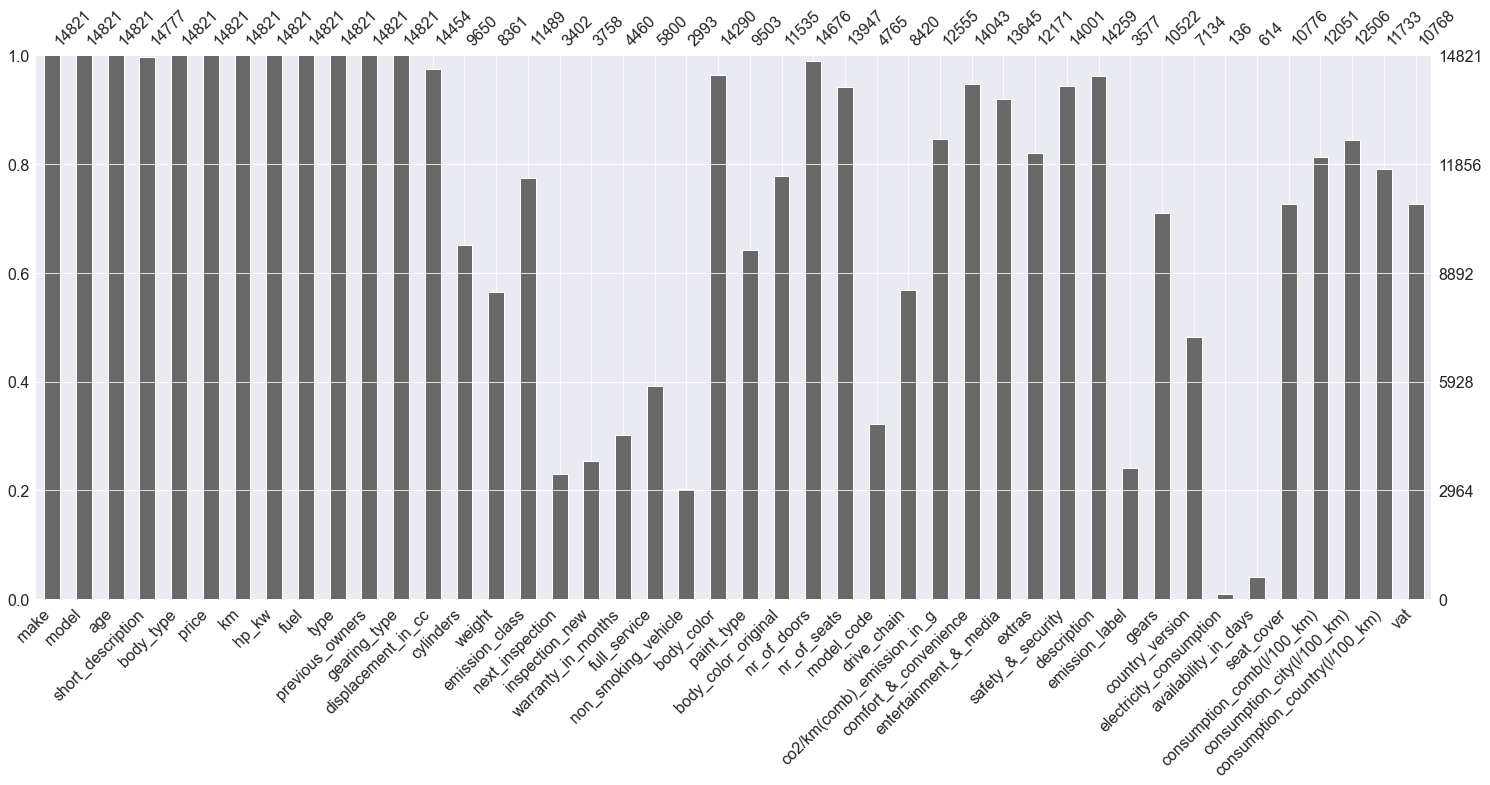

In [349]:
msno.bar(df)

In [350]:
pd.set_option('display.max_columns', 55)

In [351]:
df['displacement_in_cc'].isna().sum()

367

In [352]:
df.groupby(['make', 'model', 'age', 'body_type', 'hp_kw', 'fuel', 'gearing_type'])[['displacement_in_cc']].first()

displacement_in_cc
make    model  age body_type hp_kw fuel    gearing_type                      
Audi    A1     1.0 Compact   70.0  Benzine Automatic                    999.0
                                           Manual                       999.0
                             71.0  Benzine Automatic                    999.0
                                           Manual                       999.0
                             85.0  Benzine Automatic                    999.0
...                                                                       ...
Renault Espace 4.0 Van       118.0 Diesel  Semi-automatic              1598.0
                             119.0 Diesel  Automatic                   1598.0
                             120.0 Diesel  Automatic                   1596.0
                             147.0 Benzine Automatic                   1618.0
                                           Semi-automatic              1618.0

[996 rows x 1 columns]

In [353]:
df.groupby(['make', 'model', 'age'])['displacement_in_cc'].transform(lambda x: x.mode()[0])

0         999.0
1         999.0
2         999.0
3         999.0
4         999.0
          ...  
15914    1798.0
15915    1798.0
15916    1798.0
15917    1798.0
15918    1798.0
Name: displacement_in_cc, Length: 14821, dtype: float64

In [354]:
df['displacement_in_cc'].fillna(df.groupby(['make', 'model', 'age'])['displacement_in_cc'].transform(lambda x: x.mode()[0]), inplace=True)

In [355]:
df['displacement_in_cc'].value_counts(dropna=False)

1598.0     4646
999.0      2358
1398.0     1312
1399.0      716
1956.0      656
1229.0      641
1461.0      586
1490.0      545
1422.0      437
898.0       332
1197.0      320
1968.0      299
1395.0      265
1149.0      260
1798.0      210
1498.0      168
1618.0      143
1600.0      126
1997.0      103
1248.0      102
1400.0       90
1364.0       85
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1984.0       18
1200.0       17
1397.0       11
899.0        11
1499.0        5
929.0         5
997.0         4
139.0         4
900.0         4
1596.0        4
1199.0        3
1599.0        3
1396.0        3
1495.0        2
2.0           2
1300.0        2
1589.0        2
995.0         2
1533.0        1
160.0         1
1333.0        1
1995.0        1
1580.0        1
890.0         1
54.0          1
1496.0        1
1100.0        1
1350.0        1
16000.0       1
1856.0        1
1568.0        1
1896.0        1
1584.0        1
996.0   

In [356]:
df['cylinders'].value_counts(dropna=False)

4.0    7605
NaN    5171
3.0    2015
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: cylinders, dtype: int64

In [357]:
df.groupby(['make', 'model', 'age','body_type'])[['cylinders']].first()

cylinders
make    model  age body_type               
Audi    A1     1.0 Compact              3.0
                   Sedans               3.0
                   Station wagon        NaN
                   Van                  NaN
               2.0 Compact              3.0
...                                     ...
Renault Espace 4.0 Off-Road             NaN
                   Sedans               4.0
                   Station wagon        4.0
                   Transporter          4.0
                   Van                  4.0

[126 rows x 1 columns]

In [358]:
df[df['model'] != 'A2'].groupby(['make', 'model', 'age'])['cylinders'].transform(lambda x: x.mode()[0])

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
15914    4.0
15915    4.0
15916    4.0
15917    4.0
15918    4.0
Name: cylinders, Length: 14820, dtype: float64

In [359]:
df[df['model'] == 'A2']

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
2614,Audi,A2,2.0,"30 TDI Navi, Lane assist, Sitzheizung, Einpark...",Off-Road,28200,26166.0,85.0,Diesel,Employee's car,1.0,Manual,1598.0,NaN,NaN,Euro 6,10/2019,NaN,NaN,NaN,NaN,Grey,Metallic,G3 Nanograu Metallic,5.0,5.0,0588/BJV,front,NaN,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...","'\n', 'Technik & Sicherheit:', '7-Gang-Automat...",['\n4 (Green)\n'],NaN,Germany,NaN,NaN,Cloth,4.9,5.6,4.5,VAT deductible


In [360]:
df.loc[2614,'cylinders'] = 4.0

In [361]:
df['cylinders'].fillna(df.groupby(['make', 'model', 'age'])['cylinders'].transform(lambda x: x.mode()[0]), inplace=True)

In [362]:
df['cylinders'].value_counts(dropna=False)

4.0    11826
3.0     2965
5.0       22
6.0        3
8.0        2
2.0        2
1.0        1
Name: cylinders, dtype: int64

In [363]:
df['weight'].value_counts(dropna=False)

NaN       6460
1163.0     524
1360.0     331
1165.0     261
1335.0     241
          ... 
1213.0       1
1960.0       1
1258.0       1
1167.0       1
2037.0       1
Name: weight, Length: 435, dtype: int64

In [364]:
df.groupby(['make', 'model', 'age','body_type'])['weight'].mean()

make     model   age  body_type    
Audi     A1      1.0  Compact          1183.482234
                      Sedans           1279.529210
                      Station wagon    1237.500000
                      Van                      NaN
                 2.0  Compact          1151.696970
                                          ...     
Renault  Espace  4.0  Off-Road                 NaN
                      Sedans                   NaN
                      Station wagon    1679.760000
                      Transporter      2007.735294
                      Van              1686.683333
Name: weight, Length: 126, dtype: float64

In [365]:
df[(df['model'] == 'A1') & (df['body_type'] == 'Van')]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
2382,Audi,A1,1.0,S line,Van,29000,3000.0,147.0,Benzine,Demonstration,1.0,Automatic,1984.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black,Metallic,noir,5.0,NaN,NaN,front,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer,Radio,Sound system...",NaN,"ABS,Electronic stability control,Isofix,Power ...","'\n', ' ', 'Sous reserve de vente et d erreur ...",NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAT deductible


In [366]:
df.loc[2382, 'body_type'] = 'Compact'

In [367]:
df[(df['model'] == 'Espace') & (df['body_type'] == 'Sedans')]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
14953,Renault,Espace,2.0,INTENS 1.6 DCI 160 cv DIESEL 14478 Km,Sedans,25995,14478.000000,118.0,Diesel,Used,1.0,Automatic,1600.0,4.0,NaN,Euro 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,"Air conditioning,Automatic climate control,Cru...",On-board computer,"Alloy wheels,Roof rack","Central door lock with remote control,Driver-s...","'\n', 'Système anti-blocage des roues (ABS)', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAT deductible
14955,Renault,Espace,2.0,INTENS 1.6 DCI 160 cv DIESEL 16247 Km,Sedans,25995,16247.000000,118.0,Diesel,Used,1.0,Automatic,1600.0,4.0,NaN,Euro 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,"Air conditioning,Automatic climate control,Cru...",On-board computer,"Alloy wheels,Roof rack","Central door lock with remote control,Driver-s...","'\n', 'Système anti-blocage des roues (ABS)', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAT deductible
14968,Renault,Espace,4.0,5 Initiale Paris TCe 200 EDC,Sedans,25900,41378.000000,147.0,Benzine,Used,1.0,Automatic,1618.0,4.0,NaN,NaN,NaN,NaN,12.0,NaN,NaN,Black,Metallic,NaN,5.0,NaN,NaN,NaN,NaN,"Air conditioning,Automatic climate control,Cru...",NaN,Alloy wheels,"ABS,Alarm system,Central door lock,Driver-side...",NaN,NaN,7.0,NaN,NaN,NaN,Full leather,NaN,NaN,NaN,NaN
14985,Renault,Espace,2.0,ENERGY dCi 160 EDC Intens,Sedans,27001,14651.000000,118.0,Diesel,Used,1.0,Automatic,1598.0,4.0,NaN,Euro 6,NaN,NaN,NaN,NaN,NaN,Black,NaN,GNE Noir Etoile,4.0,5.0,3333/BDQ,NaN,123.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen,Voice Control","ABS,Blind spot monitor,Central door lock,Drive...","'\n18"" Leichtmetallfelgen, ABS, ASR, athermisc...",['\n4 (Green)\n'],NaN,NaN,NaN,NaN,Part leather,4.7,5.0,4.4,VAT deductible
15024,Renault,Espace,2.0,1.6 dCi Energy Intens 160CV EDC 7pl,Sedans,25490,24053.000000,118.0,Diesel,Used,1.0,Automatic,1598.0,4.0,NaN,Euro 6,NaN,NaN,24.0,NaN,NaN,Grey,Metallic,NaN,4.0,5.0,NaN,NaN,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer","Alloy wheels,Trailer hitch","ABS,Alarm system,Central door lock,Driver-side...",'\nEn savoir plus ? Recevez une vidéo personna...,NaN,NaN,NaN,NaN,NaN,Part leather,NaN,NaN,NaN,VAT deductible
15025,Renault,Espace,2.0,1.6 dCi Energy Intens 160CV EDC 7pl,Sedans,25490,20329.000000,118.0,Diesel,Used,1.0,Automatic,1598.0,4.0,NaN,Euro 6,NaN,NaN,24.0,NaN,NaN,Grey,Metallic,NaN,4.0,5.0,NaN,NaN,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer","Alloy wheels,Trailer hitch","ABS,Alarm system,Central door lock,Driver-side...",'\nEn savoir plus ? Recevez une vidéo personna...,NaN,NaN,NaN,NaN,NaN,Part leather,NaN,NaN,NaN,VAT deductible
15155,Renault,Espace,3.0,"RENAULT 1.6 dci 160 cv Intense Energy, 118 kW/160",Sedans,23800,56340.000000,1.0,Diesel,Used,1.0,Automatic,1589.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grey,NaN,Grigio,5.0,5.0,NaN,front,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",NaN,"Alarm system,Central door lock,Driver-side air...","'\nDEK:[2026007]', 'Con la formula Rent2Buy è ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15156,Renault,Espace,3.0,"RENAULT 1.6 dci 160 cv Intense Energy, 118 kW/160",Sedans,23800,69600.000000,1.0,Diesel,Used,1.0,Automatic,1589.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [368]:
df.groupby(['make', 'model', 'age','body_type'])['weight']

In [369]:
df.loc[2614,'weight'] = 1420.0

In [370]:
df.loc[2614,'model'] = 'Q2'

In [371]:
df.groupby(['make', 'model', 'body_type'])['weight'].mean()

make     model     body_type    
Audi     A1        Compact          1173.871102
                   Coupe            1010.000000
                   Sedans           1258.167224
                   Station wagon    1228.571429
         A3        Compact          1320.142857
                   Convertible      1519.285714
                   Coupe            1260.000000
                   Sedans           1398.485022
                   Station wagon    1318.362832
         Q2        Off-Road         1420.000000
Opel     Astra     Compact          1287.641975
                   Coupe            1350.000000
                   Off-Road         1340.000000
                   Sedans           1329.382716
                   Station wagon    1397.511327
         Corsa     Compact          1171.946257
                   Coupe            1203.000000
                   Off-Road         1187.666667
                   Sedans           1171.867624
                   Transporter      1181.000000
       

In [372]:
df[(df['model'] == 'Insignia') & (df['body_type'] == 'Coupe')]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
11620,Opel,Insignia,3.0,2 GRAND SPORT EDITION 110 CDTI,Coupe,17094,28142.0,81.0,Diesel,Used,1.0,Manual,1598.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GDX Darkmoon Blue,4.0,NaN,NaN,NaN,NaN,Park Distance Control,NaN,NaN,"Passenger-side airbag,Side airbag","""\nAide Au Démarrage En Côte , Air Conditionné...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:
df.loc[11620,'weight'] = 1428.0

In [374]:
df.loc[11620,'body_type'] = 'Compact'

In [375]:
df[(df['model'] == 'Insignia') & (df['body_type'] == 'Van')]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
12142,Opel,Insignia,2.0,ST DYNAMIC 1.5 TURBO S/S,Van,20980,23726.0,121.0,Benzine,Employee's car,1.0,Manual,1496.0,4.0,NaN,NaN,04/2021,NaN,NaN,NaN,NaN,Grey,Metallic,Licht Grau M2,5.0,5.0,NaN,front,NaN,"Armrest,Leather steering wheel,Seat heating,St...",USB,"Roof rack,Sport seats","ABS,Central door lock,Daytime running lights,E...","'\n', '12 V Steckdose im Laderaum', '2 USB Sch...",NaN,6.0,Germany,NaN,NaN,Cloth,NaN,NaN,NaN,VAT deductible


In [376]:
df.loc[12142,'weight'] = 1448.0

In [377]:
df.loc[11620,'body_type'] = 'Station wagon'

In [378]:
df[(df['model'] == 'Clio') & (df['body_type'] == 'Coupe')]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
14020,Renault,Clio,3.0,RS TCe 200 EDC Navi Kamera SHZ,Coupe,17990,24500.0,147.0,Benzine,Used,1.0,Automatic,1618.0,4.0,NaN,Euro 6,NaN,Yes,12.0,4 (Green),NaN,White,NaN,WEISS GLACIER,4.0,5.0,NaN,front,140.0,"Air conditioning,Cruise control,Electrical sid...","Digital radio,Hands-free equipment,On-board co...","Alloy wheels,Shift paddles,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...","'\n', 'sauberes und gepflegtes Fahrzeug', '1. ...",NaN,6.0,Germany,NaN,NaN,Full leather,5.9,7.6,5.0,NaN


In [379]:
df.loc[14020,'weight'] = 1279.0

In [380]:
df[(df['model'] == 'Clio') & (df['body_type'] == 'Van')]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
13886,Renault,Clio,3.0,Energy 1.5 dCi 75cv euro 6,Van,9400,36000.0,55.0,Diesel,Used,1.0,Manual,1461.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,NaN,Bianco,NaN,2.0,NaN,front,NaN,NaN,NaN,NaN,NaN,NaN,"[[], [], []]",NaN,NaN,NaN,NaN,Cloth,NaN,NaN,NaN,NaN
14119,Renault,Clio,2.0,Cargo Extra Energy dCi 75+Sortimon Ladungssicheru,Van,9900,22613.0,55.0,Diesel,Used,1.0,Manual,1461.0,4.0,NaN,NaN,03/2020,NaN,NaN,NaN,NaN,White,NaN,OV is Weiß,5.0,5.0,3333/BEZ,NaN,NaN,"Air conditioning,Automatic climate control,Cru...","CD player,MP3,On-board computer,Radio,USB",NaN,"ABS,Central door lock,Daytime running lights,D...","'\n', 'Sicherheit:', ' ', 'Tagfahrlicht', ' ',...",NaN,NaN,NaN,NaN,NaN,Cloth,NaN,NaN,NaN,VAT deductible


In [381]:
df.groupby(['make', 'model','body_type'])['weight'].mean()

make     model     body_type    
Audi     A1        Compact          1173.871102
                   Coupe            1010.000000
                   Sedans           1258.167224
                   Station wagon    1228.571429
         A3        Compact          1320.142857
                   Convertible      1519.285714
                   Coupe            1260.000000
                   Sedans           1398.485022
                   Station wagon    1318.362832
         Q2        Off-Road         1420.000000
Opel     Astra     Compact          1287.641975
                   Coupe            1350.000000
                   Off-Road         1340.000000
                   Sedans           1329.382716
                   Station wagon    1397.511327
         Corsa     Compact          1171.946257
                   Coupe            1203.000000
                   Off-Road         1187.666667
                   Sedans           1171.867624
                   Transporter      1181.000000
       

In [382]:
df.loc[14119,'body_type'] = 'Compact'

In [383]:
df.loc[13886,'body_type'] = 'Compact'

In [384]:
df.groupby(['make', 'model','body_type'])['weight'].mean()

make     model     body_type    
Audi     A1        Compact          1173.871102
                   Coupe            1010.000000
                   Sedans           1258.167224
                   Station wagon    1228.571429
         A3        Compact          1320.142857
                   Convertible      1519.285714
                   Coupe            1260.000000
                   Sedans           1398.485022
                   Station wagon    1318.362832
         Q2        Off-Road         1420.000000
Opel     Astra     Compact          1287.641975
                   Coupe            1350.000000
                   Off-Road         1340.000000
                   Sedans           1329.382716
                   Station wagon    1397.511327
         Corsa     Compact          1171.946257
                   Coupe            1203.000000
                   Off-Road         1187.666667
                   Sedans           1171.867624
                   Transporter      1181.000000
       

In [385]:
df[(df['model'] == 'Duster') & (df['body_type'] == 'Off-Road')]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
14894,Renault,Duster,1.0,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,13250,101.0,77.0,Benzine,New,0.0,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,NaN,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n- EXPORT OUT EU TROPICAL VERSION', 'Prix T1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14895,Renault,Duster,1.0,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,16033,101.0,77.0,Benzine,New,0.0,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,Uni/basic,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n', ' - EXPORT OUT EU TROPICAL VERSION', 'Pr...",NaN,NaN,Japan,NaN,NaN,Cloth,NaN,NaN,NaN,VAT deductible
14896,Renault,Duster,1.0,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,16033,101.0,77.0,Benzine,Used,0.0,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,Uni/basic,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n', ' - EXPORT OUT EU TROPICAL VERSION', 'Pr...",NaN,NaN,NaN,NaN,NaN,Cloth,NaN,NaN,NaN,VAT deductible
14897,Renault,Duster,1.0,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,16033,101.0,77.0,Benzine,New,0.0,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,NaN,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n- EXPORT OUT EU TROPICAL VERSION', 'Prix TV...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAT deductible
14898,Renault,Duster,1.0,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,16033,101.0,77.0,Benzine,Used,0.0,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,NaN,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n- EXPORT OUT EU TROPICAL VERSION', 'Prix TV...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAT deductible
14899,Renault,Duster,1.0,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,13250,101.0,77.0,Benzine,Used,0.0,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,Uni/basic,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n', ' - EXPORT OUT EU TROPICAL VERSION', 'Pr...",NaN,NaN,NaN,NaN,NaN,Cloth,NaN,NaN,NaN,NaN
14900,Renault,Duster,1.0,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,13250,101.0,77.0,Benzine,New,0.0,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,Uni/basic,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n', ' - EXPORT OUT EU TROPICAL VERSION', 'Pr...",NaN,NaN,Japan,NaN,NaN,Cloth,NaN,NaN,NaN,NaN
14901,Renault,Duster,1.0,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPO...,Off-Road,13250,101.0,77.0,Benzine,Used,0.0,Automatic,1998.0,4.0,NaN,Euro 4,NaN,NaN,12.0,NaN,NaN,Black,NaN,NaN,5.0,5.0,NaN,NaN,150.0,"Air conditioning,Automatic climate control","Bluetooth,CD player,Radio,USB",NaN,"ABS,Driver-side airbag,Power steering","'\n- EXPORT OUT EU TROPICAL VERSION', 'Prix t

In [386]:
df.loc[(df['model'] == 'Duster') & (df['body_type'] == 'Off-Road'), 'weight'] = 1394.0

In [387]:
df.groupby(['make', 'model','body_type'])['weight'].mean()

make     model     body_type    
Audi     A1        Compact          1173.871102
                   Coupe            1010.000000
                   Sedans           1258.167224
                   Station wagon    1228.571429
         A3        Compact          1320.142857
                   Convertible      1519.285714
                   Coupe            1260.000000
                   Sedans           1398.485022
                   Station wagon    1318.362832
         Q2        Off-Road         1420.000000
Opel     Astra     Compact          1287.641975
                   Coupe            1350.000000
                   Off-Road         1340.000000
                   Sedans           1329.382716
                   Station wagon    1397.511327
         Corsa     Compact          1171.946257
                   Coupe            1203.000000
                   Off-Road         1187.666667
                   Sedans           1171.867624
                   Transporter      1181.000000
       

In [388]:
df[(df['model'] == 'Espace') & (df['body_type'] == 'Coupe')]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
15008,Renault,Espace,2.0,INTENS 160 DCI EDC,Coupe,26994,14478.0,118.0,Diesel,Used,1.0,Automatic,1598.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GNE Noir Etoile,5.0,NaN,NaN,NaN,NaN,Park Distance Control,NaN,NaN,"Driver-side airbag,Passenger-side airbag,Side ...","'\nAide Au Démarrage En Côte , Aide Au Station...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15785,Renault,Espace,1.0,INITIALE PARIS 225 TCE GPF EDC,Coupe,34140,10.0,165.0,Benzine,New,0.0,Automatic,1798.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GNE NOIR ETOILE,NaN,NaN,NaN,NaN,NaN,Park Distance Control,NaN,NaN,"Driver-side airbag,Passenger-side airbag,Side ...","'\nAccoudoir Avant , Aide Au Démarrage En Côte...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VAT deductible


In [389]:
df.loc[15008,'body_type'] = 'Van'

In [390]:
df.loc[15785,'body_type'] = 'Van'

In [391]:
df.groupby(['make', 'model','body_type'])['weight'].mean()

make     model     body_type    
Audi     A1        Compact          1173.871102
                   Coupe            1010.000000
                   Sedans           1258.167224
                   Station wagon    1228.571429
         A3        Compact          1320.142857
                   Convertible      1519.285714
                   Coupe            1260.000000
                   Sedans           1398.485022
                   Station wagon    1318.362832
         Q2        Off-Road         1420.000000
Opel     Astra     Compact          1287.641975
                   Coupe            1350.000000
                   Off-Road         1340.000000
                   Sedans           1329.382716
                   Station wagon    1397.511327
         Corsa     Compact          1171.946257
                   Coupe            1203.000000
                   Off-Road         1187.666667
                   Sedans           1171.867624
                   Transporter      1181.000000
       

In [392]:
df['weight'].fillna(df.groupby(['make', 'model', 'age'])['weight'].transform(lambda x: x.mode()[0]), inplace=True)

In [393]:
df['weight'].value_counts(dropna=False)

1163.0    1455
1360.0    1113
1135.0    1007
1522.0     532
1278.0     476
          ... 
1331.0       1
1132.0       1
1252.0       1
1792.0       1
2037.0       1
Name: weight, Length: 435, dtype: int64

In [394]:
df['weight'].isna().sum()

0

In [395]:
df.head()

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
0,Audi,A1,4.0,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,56013.0,66.0,Diesel,Used,2.0,Automatic,1422.0,3.0,1220.0,Euro 6,06/2021,Yes,NaN,NaN,NaN,Black,Metallic,Mythosschwarz,5.0,5.0,0588/BDF,front,99.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Sicherheit:', ' ', 'Deaktivierung für B...",NaN,NaN,NaN,NaN,NaN,Cloth,3.8,4.3,3.5,VAT deductible
1,Audi,A1,3.0,1.8 TFSI sport,Sedans,14500,80000.0,141.0,Benzine,Used,1.0,Automatic,1798.0,4.0,1255.0,Euro 6,NaN,NaN,NaN,NaN,NaN,Red,NaN,NaN,3.0,4.0,0588/BCY,front,129.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",'\nLangstreckenfahrzeug daher die hohe Kilomet...,['\n4 (Green)\n'],7.0,NaN,NaN,NaN,Cloth,5.6,7.0,4.7,Price negotiable
2,Audi,A1,4.0,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,83450.0,85.0,Diesel,Used,1.0,Automatic,1598.0,3.0,1135.0,Euro 6,NaN,NaN,NaN,NaN,NaN,Black,Metallic,mythosschwarz metallic,4.0,4.0,NaN,front,99.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Fahrzeug-Nummer: AM-95365', ' ', 'Ehem....",['\n4 (Green)\n'],NaN,NaN,NaN,NaN,Cloth,3.8,4.4,3.4,VAT deductible
3,Audi,A1,4.0,1.4 TDi Design S tronic,Sedans,14500,73000.0,66.0,Diesel,Used,1.0,Automatic,1422.0,3.0,1195.0,Euro 6,NaN,NaN,NaN,99 g CO2/km (comb),Euro 6,Brown,Metallic,NaN,3.0,4.0,NaN,NaN,99.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","'\nAudi A1: ', '- 1e eigenaar ', '- Perfecte s...",NaN,6.0,NaN,NaN,NaN,NaN,3.8,4.3,3.5,NaN
4,Audi,A1,4.0,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,16200.0,66.0,Diesel,Used,1.0,Automatic,1422.0,3.0,1135.0,Euro 6,NaN,Yes,NaN,4 (Green),NaN,Black,Metallic,Mythosschwarz Metallic,5.0,5.0,0588/BDF,front,109.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","'\n', 'Technik & Sicherheit:', 'Xenon plus', '...",NaN,NaN,Germany,NaN,NaN,Cloth,4.0,4.6,3.8,NaN


In [396]:
df['emission_class'].value_counts(dropna=False)

Euro 6          9498
NaN             3332
Euro 6d-TEMP    1685
Euro 6c          126
Euro 5            78
Euro 6d           62
Euro 4            40
Name: emission_class, dtype: int64

In [397]:
df['emission_class'].fillna(df.groupby(['make', 'model', 'age'])['emission_class'].transform(lambda x: x.mode()[0]), inplace=True)

In [398]:
df['emission_class'].value_counts(dropna=False)

Euro 6          12254
Euro 6d-TEMP     2259
Euro 6c           126
Euro 5             78
Euro 6d            62
Euro 4             42
Name: emission_class, dtype: int64

In [399]:
df.groupby(['make', 'model', 'age', 'body_type'])['body_color'].transform(lambda x: x.mode()[0])

0        Black
1        Black
2        Black
3        Black
4        Black
         ...  
15914    White
15915    White
15916    White
15917    White
15918    White
Name: body_color, Length: 14821, dtype: object

In [400]:
df['body_color'].fillna(df.groupby(['make', 'model', 'age', 'body_type'])['body_color'].transform(lambda x: x.mode()[0]), inplace=True)

In [401]:
df['body_color'].isna().sum()

0

In [402]:
df.groupby(['make', 'model'])['paint_type'].first()

make     model   
Audi     A1           Metallic
         A3           Metallic
         Q2           Metallic
Opel     Astra        Metallic
         Corsa        Metallic
         Insignia     Metallic
Renault  Clio         Metallic
         Duster      Uni/basic
         Espace       Metallic
Name: paint_type, dtype: object

In [403]:
df.groupby(['make', 'model'])['paint_type'].transform(lambda x: x.mode()[0])

0        Metallic
1        Metallic
2        Metallic
3        Metallic
4        Metallic
           ...   
15914    Metallic
15915    Metallic
15916    Metallic
15917    Metallic
15918    Metallic
Name: paint_type, Length: 14821, dtype: object

In [404]:
df['paint_type'].fillna(df.groupby(['make', 'model'])['paint_type'].transform(lambda x: x.mode()[0]), inplace=True)

In [405]:
df['paint_type'].isna().sum()

0

In [406]:
df.groupby(['make', 'model'])['paint_type'].transform(lambda x: x.mode()[0])

0        Metallic
1        Metallic
2        Metallic
3        Metallic
4        Metallic
           ...   
15914    Metallic
15915    Metallic
15916    Metallic
15917    Metallic
15918    Metallic
Name: paint_type, Length: 14821, dtype: object

In [407]:
df['body_color_original'].value_counts(dropna=False)

NaN                              3286
Onyx Schwarz                      333
Mythosschwarz Metallic            233
Brillantschwarz                   209
Bianco                            206
                                 ... 
platin anthrazit-perleffekt         1
Azur blau (m2)                      1
Grijs (licht zilver metal           1
nero                                1
Perlmutt-Weiß Metallic (Weiß)       1
Name: body_color_original, Length: 1927, dtype: int64

In [408]:
df.groupby(['make', 'model', 'body_color'])['body_color_original'].first()

make     model     body_color
Audi     A1        Beige                   Siambeige Metallic
                   Black                        Mythosschwarz
                   Blue                               Azzurro
                   Brown                            sohobraun
                   Green                         Verde tioman
                   Grey                                Grigio
                   Red                   Misanorot Perleffekt
                   Silver              Florettsilber Metallic
                   Violet                                None
                   White                       Gletscherweiss
                   Yellow                           Speedgelb
         A3        Black                   mythosschwarz met.
                   Blue                                   Blu
                   Bronze                      NERO BRILLANTE
                   Brown                 belugabraun metallic
                   Grey                 

In [409]:
df.head()

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
0,Audi,A1,4.0,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,56013.0,66.0,Diesel,Used,2.0,Automatic,1422.0,3.0,1220.0,Euro 6,06/2021,Yes,NaN,NaN,NaN,Black,Metallic,Mythosschwarz,5.0,5.0,0588/BDF,front,99.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Sicherheit:', ' ', 'Deaktivierung für B...",NaN,NaN,NaN,NaN,NaN,Cloth,3.8,4.3,3.5,VAT deductible
1,Audi,A1,3.0,1.8 TFSI sport,Sedans,14500,80000.0,141.0,Benzine,Used,1.0,Automatic,1798.0,4.0,1255.0,Euro 6,NaN,NaN,NaN,NaN,NaN,Red,Metallic,NaN,3.0,4.0,0588/BCY,front,129.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",'\nLangstreckenfahrzeug daher die hohe Kilomet...,['\n4 (Green)\n'],7.0,NaN,NaN,NaN,Cloth,5.6,7.0,4.7,Price negotiable
2,Audi,A1,4.0,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,83450.0,85.0,Diesel,Used,1.0,Automatic,1598.0,3.0,1135.0,Euro 6,NaN,NaN,NaN,NaN,NaN,Black,Metallic,mythosschwarz metallic,4.0,4.0,NaN,front,99.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Fahrzeug-Nummer: AM-95365', ' ', 'Ehem....",['\n4 (Green)\n'],NaN,NaN,NaN,NaN,Cloth,3.8,4.4,3.4,VAT deductible
3,Audi,A1,4.0,1.4 TDi Design S tronic,Sedans,14500,73000.0,66.0,Diesel,Used,1.0,Automatic,1422.0,3.0,1195.0,Euro 6,NaN,NaN,NaN,99 g CO2/km (comb),Euro 6,Brown,Metallic,NaN,3.0,4.0,NaN,NaN,99.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","'\nAudi A1: ', '- 1e eigenaar ', '- Perfecte s...",NaN,6.0,NaN,NaN,NaN,NaN,3.8,4.3,3.5,NaN
4,Audi,A1,4.0,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,16200.0,66.0,Diesel,Used,1.0,Automatic,1422.0,3.0,1135.0,Euro 6,NaN,Yes,NaN,4 (Green),NaN,Black,Metallic,Mythosschwarz Metallic,5.0,5.0,0588/BDF,front,109.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","'\n', 'Technik & Sicherheit:', 'Xenon plus', '...",NaN,NaN,Germany,NaN,NaN,Cloth,4.0,4.6,3.8,NaN


In [410]:
df['nr_of_doors'].value_counts(dropna=False)

5.0    10849
4.0     2855
3.0      776
2.0      194
NaN      145
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

In [411]:
df.groupby(['make', 'model', 'body_type'])[['nr_of_doors']].first().T

make           Audi                                                       \
model            A1                                 A3                     
body_type   Compact Coupe Sedans Station wagon Compact Convertible Coupe   
nr_of_doors     5.0   2.0    5.0           4.0     5.0         2.0   3.0   

make                                         Opel                        \
model                                  Q2   Astra                         
body_type   Sedans Station wagon Off-Road Compact Coupe Off-Road Sedans   
nr_of_doors    3.0           5.0      5.0     4.0   3.0      5.0    5.0   

make                                                                     \
model                       Corsa                                         
body_type   Station wagon Compact Coupe Off-Road Sedans Transporter Van   
nr_of_doors           5.0     5.0   5.0      5.0    5.0         3.0 NaN   

make                                                    Renault        \
model       Insignia                                       Clio         
body_type    Compact Off-Road Sedans Station wagon  Van Compact Coupe   
nr_of_doors      4.0      5.0    5.0           4.0  5.0     4.0   4.0   

make                                                                    \
model                                                   Duster  Espace   
body_type   Off-Road Sedans Station wagon Transporter Off-Road Compact   
nr_of_doors      5.0    5.0           5.0         5.0      5.0     5.0   

make                                                        
model                                                       
body_type   Off-Road Sedans Station wagon Transporter  Van  
nr_of_doors      5.0    5.0           5.0         5.0  5.0

In [412]:
df[(df['model'] == 'Corsa') & (df['body_type'] == 'Van')]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
8952,Opel,Corsa,4.0,"Opel Van 1,2",Van,7900,33633.0,51.0,Benzine,Used,1.0,Manual,1229.0,4.0,1124.0,Euro 6,NaN,NaN,NaN,NaN,NaN,White,Metallic,weiß,NaN,NaN,NaN,NaN,NaN,"Air conditioning,Park Distance Control,Parking...",Bluetooth,NaN,"Central door lock,Driver-side airbag,Passenger...",'\nFür weitere Fragen wenden Sie sich bitte an...,NaN,NaN,Austria,NaN,NaN,NaN,NaN,NaN,NaN,VAT deductible


In [413]:
df.loc[8952, 'body_type'] = 'Compact'

In [414]:
df['nr_of_doors'].fillna(df.groupby(['make', 'model', 'body_type'])['nr_of_doors'].transform(lambda x: x.mode()[0]), inplace=True)

In [415]:
df['nr_of_doors'].isna().sum()

0

In [416]:
df['nr_of_seats'].fillna(df.groupby(['make', 'model', 'body_type'])['nr_of_seats'].transform(lambda x: x.mode()[0]), inplace=True)

In [417]:
df['nr_of_seats'].isna().sum()

0

In [418]:
df['drive_chain'].value_counts(dropna=False)

front    8265
NaN      6401
4WD       151
rear        4
Name: drive_chain, dtype: int64

In [419]:
df.groupby(['make', 'model', 'body_type'])[['drive_chain']].first().T

make           Audi                                                        \
model            A1                                 A3                      
body_type   Compact Coupe Sedans Station wagon Compact Convertible  Coupe   
drive_chain   front  None  front         front   front       front  front   

make                                         Opel                        \
model                                  Q2   Astra                         
body_type   Sedans Station wagon Off-Road Compact Coupe Off-Road Sedans   
drive_chain  front         front    front   front  None    front  front   

make                                                                           \
model                       Corsa                                    Insignia   
body_type   Station wagon Compact  Coupe Off-Road Sedans Transporter  Compact   
drive_chain         front   front  front     None  front       front    front   

make                                             Renault                  \
model                                               Clio                   
body_type   Off-Road Sedans Station wagon    Van Compact  Coupe Off-Road   
drive_chain      4WD  front         front  front   front  front    front   

make                                                                           \
model                                          Duster  Espace                   
body_type   Sedans Station wagon Transporter Off-Road Compact Off-Road Sedans   
drive_chain  front         front       front      4WD   front    front  front   

make                                          
model                                         
body_type   Station wagon Transporter    Van  
drive_chain         front       front  front

In [420]:
df[(df['model'] == 'A1') & (df['body_type'] == 'Coupe')]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
842,Audi,A1,4.0,1.0 TFSI,Coupe,13950,27300.0,70.0,Benzine,Used,2.0,Manual,999.0,3.0,1010.0,Euro 6,11/2020,NaN,NaN,NaN,NaN,Black,Metallic,NaN,2.0,4.0,NaN,NaN,97.0,"Air conditioning,Cruise control,Electrically h...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Catalytic Converter","ABS,Adaptive Cruise Control,Central door lock,...",'\nSupermooie Audi A1 met zeer weinig km.27300...,NaN,5.0,NaN,NaN,NaN,NaN,4.2,5.0,3.7,VAT deductible
1203,Audi,A1,3.0,5 PORTE 1'6TDI 116CV DPF SPORT METAL PLUS,Coupe,15900,50000.0,85.0,Diesel,Used,1.0,Manual,1598.0,3.0,1135.0,Euro 6,NaN,NaN,NaN,1 (No sticker),NaN,Black,Metallic,NaN,5.0,5.0,NaN,NaN,NaN,"Air conditioning,Air suspension,Armrest,Auxili...","CD player,Hands-free equipment,MP3,On-board co...","Alloy wheels,Catalytic Converter,Sport seats,S...","ABS,Adaptive Cruise Control,Adaptive headlight...","'\n', 'PECIAL\xa0', 'OFFERTA WEB\xa0', ""SPLEND...",['\n1 (No sticker)\n'],NaN,NaN,NaN,NaN,Part leather,NaN,NaN,NaN,VAT deductible


In [421]:
df.loc[(df['model'] == 'A1') & (df['body_type'] == 'Coupe'), 'drive_chain'] = 'front'

In [422]:
df.loc[(df['model'] == 'Corsa') & (df['body_type'] == 'Off-Road'), 'body_type'] = 'Compact'

In [423]:
df.loc[(df['model'] == 'Astra') & (df['body_type'] == 'Coupe'), 'drive_chain'] = 'front'

In [424]:
df['drive_chain'].fillna(df.groupby(['make', 'model', 'body_type'])['drive_chain'].transform(lambda x: x.mode()[0]), inplace=True)

In [425]:
df['drive_chain'].isna().sum()

0

In [426]:
df['co2/km(comb)_emission_in_g'].value_counts(dropna=False)

NaN       2266
120.00     666
99.00      532
97.00      508
10.00      469
          ... 
80.00        1
160.00       1
990.00       1
1.06         1
193.00       1
Name: co2/km(comb)_emission_in_g, Length: 121, dtype: int64

In [427]:
df.drop(index=2614, axis=0, inplace =True)

In [428]:
df.groupby(['make', 'model', 'body_type', 'fuel'])[['co2/km(comb)_emission_in_g']].mean().T

make                             Audi                                       \
model                              A1                                        
body_type                     Compact              Coupe            Sedans   
fuel                          Benzine     Diesel Benzine Diesel    Benzine   
co2/km(comb)_emission_in_g  88.511244  80.427778    97.0    NaN  86.546569   

make                                                                     \
model                                                                A3   
body_type                             Station wagon             Compact   
fuel                           Diesel       Benzine  Diesel     Benzine   
co2/km(comb)_emission_in_g  81.202174     73.916667  54.375  111.166667   

make                                                                     \
model                                                                     
body_type                             Convertible          Coupe          
fuel                           Diesel     Benzine Diesel Benzine Diesel   
co2/km(comb)_emission_in_g  96.184211       134.5  119.6   106.0   99.0   

make                                                                         \
model                                                                         
body_type                       Sedans                        Station wagon   
fuel                           Benzine      Diesel    LPG/CNG       Benzine   
co2/km(comb)_emission_in_g  113.576857  103.298981  96.137931    111.335938   

make                                                 Opel                      \
model                                               Astra                       
body_type                                         Compact               Coupe   
fuel                           Diesel LPG/CNG     Benzine      Diesel Benzine   
co2/km(comb)_emission_in_g  104.46875     1.0  110.242424  101.027778   144.0   

make                                                                ...  \
model                                                               ...   
body_type                  Off-Road      Sedans                     ...   
fuel                        Benzine     Benzine     Diesel LPG/CNG  ...   
co2/km(comb)_emission_in_g    128.0  110.152968  101.34188   113.0  ...   

make                                                Renault                    \
model                           Insignia               Clio                     
body_type                  Station wagon     Van    Compact             Coupe   
fuel                              Diesel Benzine    Benzine    Diesel Benzine   
co2/km(comb)_emission_in_g    125.988426     NaN  119.89781  78.52381   140.0   

make                                                                    \
model                                                                    
body_type                  Off-Road             Sedans                   
fuel                        Benzine Diesel     Benzine Diesel Electric   
co2/km(comb)_emission_in_g    125.0    NaN  122.930131   67.0      NaN   

make                                                                        \
model                                                                        
body_type                             Station wagon            Transporter   
fuel                          LPG/CNG       Benzine     Diesel     Benzine   
co2/km(comb)_emission_in_g  99.111111    123.481752  61.410853       123.0   

make                                                                       \
model                                      Duster  Espace                   
body_type                                Off-Road Compact        Off-Road   
fuel                           Diesel     Benzine Benzine Diesel   Diesel   
co2/km(comb)_emission_in_g  86.666667  171.666667   146.5  120.0    120.6   

make                                                                      \
model                                            

In [429]:
df[df['fuel'] == 'Electric']

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,next_inspection,inspection_new,warranty_in_months,full_service,non_smoking_vehicle,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,model_code,drive_chain,co2/km(comb)_emission_in_g,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,availability_in_days,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
13397,Renault,Clio,4.0,zoé life,Sedans,8490,23863.0,55.0,Electric,Used,1.0,Automatic,1461.0,4.0,1071.0,Euro 6,NaN,NaN,NaN,NaN,NaN,White,Metallic,BLANC,5.0,5.0,NaN,front,NaN,"Air conditioning,Cruise control,Navigation system",On-board computer,NaN,Driver-side airbag,"""\nTrès bon état général. Véhicule garantie po...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [430]:
df.drop(index=13397, axis=0, inplace =True)

In [431]:
df.loc[(df['model'] == 'Duster') & (df['gearing_type'] == 'Automatic'),'gears'] = 6.0

In [432]:
df.loc[(df['model'] == 'Espace') & (df['gearing_type'] == 'Semi-automatic') & (df['fuel'] == 'Benzine'),'gears'] = 7.0

In [433]:
df.groupby(['make', 'model','fuel', 'gearing_type'])[['gears']].mean().T

make              Audi                                              \
model               A1                                               
fuel           Benzine                             Diesel            
gearing_type Automatic    Manual Semi-automatic Automatic   Manual   
gears         6.941725  5.245928       6.958333  6.849398  5.00625   

make                                                                      \
model                              A3                                      
fuel                          Benzine                             Diesel   
gearing_type Semi-automatic Automatic    Manual Semi-automatic Automatic   
gears                   7.0  6.972067  6.003086        6.90566  6.895522   

make                                                                   \
model                                                                   
fuel                                    LPG/CNG                         
gearing_type    Manual Semi-automatic Automatic Manual Semi-automatic   
gears         6.006954       6.764706       7.0    6.0            7.0   

make              Opel                                                   \
model            Astra                                                    
fuel           Benzine                            Diesel        LPG/CNG   
gearing_type Automatic   Manual Semi-automatic Automatic Manual  Manual   
gears         5.880383  5.35729       5.333333  6.004167    6.0     6.0   

make                                                                 \
model            Corsa                                                
fuel           Benzine                             Diesel             
gearing_type Automatic    Manual Semi-automatic Automatic    Manual   
gears         5.791271  5.016166            5.0  5.166667  5.153846   

make                                                                      \
model                                         Insignia                     
fuel                          LPG/CNG          Benzine            Diesel   
gearing_type Semi-automatic Automatic Manual Automatic  Manual Automatic   
gears                   5.0       5.0    5.0  6.064982  5.9967    6.6368   

make                     Renault                                               \
model                       Clio                                                
fuel                     Benzine                             Diesel             
gearing_type    Manual Automatic    Manual Semi-automatic Automatic    Manual   
gears         6.010753  5.980488  5.105263            6.0  5.940678  5.024316   

make                                                                   \
model                                  Duster           Espace          
fuel                        LPG/CNG   Benzine          Benzine          
gearing_type Semi-automatic  Manual Automatic Manual Automatic Manual   
gears                   6.0     5.0       6.0    6.0  6.984127    7.0   

make                                                         
model                                                        
fuel                           Diesel                        
gearing_type Semi-automatic Automatic Manual Semi-automatic  
gears                   7.0  6.025424    6.0       6.028571

In [434]:
df['gears'].fillna(df.groupby(['make', 'model','fuel', 'gearing_type'])['gears'].transform(lambda x: x.mode()[0]), inplace=True)

In [435]:
df['gears'].isna().sum()

0

In [436]:
df['seat_cover'].value_counts(dropna=False)

Cloth           7981
NaN             4044
Part leather    1381
Full leather     960
Other            336
Velour            60
alcantara         57
Name: seat_cover, dtype: int64

In [437]:
df.loc[df['seat_cover']=='Other', 'seat_cover'] = np.nan

In [438]:
df.groupby(['make', 'model', 'body_type'])[['seat_cover']].first().T

make          Audi                                                   \
model           A1                                               A3   
body_type  Compact         Coupe Sedans Station wagon       Compact   
seat_cover   Cloth  Part leather  Cloth  Part leather  Full leather   

make                                                        Opel  \
model                                                      Astra   
body_type    Convertible  Coupe     Sedans Station wagon Compact   
seat_cover  Part leather  Cloth  alcantara         Cloth   Cloth   

make                                                                        \
model                                                         Corsa          
body_type          Coupe      Off-Road Sedans Station wagon Compact  Coupe   
seat_cover  Part leather  Part leather  Cloth  Part leather   Cloth  Cloth   

make                                                              \
model                              Insignia                        
body_type  Sedans Transporter       Compact      Off-Road Sedans   
seat_cover  Cloth       Cloth  Full leather  Full leather  Cloth   

make                            Renault                                \
model                              Clio                                 
body_type  Station wagon    Van Compact         Coupe Off-Road Sedans   
seat_cover         Cloth  Cloth   Cloth  Full leather    Cloth  Cloth   

make                                                                 \
model                                  Duster  Espace                 
body_type  Station wagon Transporter Off-Road Compact      Off-Road   
seat_cover  Part leather       Cloth    Cloth   Cloth  Full leather   

make                                                                
model                                                               
body_type         Sedans Station wagon   Transporter           Van  
seat_cover  Full leather  Full leather  Full leather  Full leather

In [439]:
df['seat_cover'].fillna(df.groupby(['make', 'model', 'body_type'])['seat_cover'].transform(lambda x: x.mode()[0]), inplace=True)

In [440]:
df['seat_cover'].isna().sum()

0

In [441]:
df['seat_cover'].value_counts(dropna=False)

Cloth           11992
Part leather     1390
Full leather     1320
Velour             60
alcantara          57
Name: seat_cover, dtype: int64

In [442]:
df['consumption_comb(l/100_km)'].isna().sum()

2769

In [443]:
df.loc[(df['model'] == 'Duster') & (df['gearing_type'] == 'Automatic'),'consumption_comb(l/100_km)'] = 8.7

In [444]:
df.groupby(['make', 'model','fuel', 'gearing_type'])['consumption_comb(l/100_km)'].mean()

make     model     fuel     gearing_type  
Audi     A1        Benzine  Automatic         4.734577
                            Manual            4.518547
                            Semi-automatic    4.828571
                   Diesel   Automatic         3.866667
                            Manual            3.772381
                            Semi-automatic    3.809677
         A3        Benzine  Automatic         4.923779
                            Manual            4.911260
                            Semi-automatic    6.384783
                   Diesel   Automatic         4.075124
                            Manual            4.036579
                            Semi-automatic    4.124324
                   LPG/CNG  Automatic         4.666667
                            Manual            3.400000
                            Semi-automatic    3.484211
Opel     Astra     Benzine  Automatic         5.513626
                            Manual            5.087121
                      

In [445]:
df.loc[(df['model'] == 'Duster') & (df['gearing_type'] == 'Manual'),'consumption_comb(l/100_km)'] = 8.4

In [446]:
df['consumption_comb(l/100_km)'].fillna(df.groupby(['make', 'model','fuel', 'gearing_type'])['consumption_comb(l/100_km)'].transform(lambda x: x.mode()[0]), inplace=True)

In [447]:
df['consumption_comb(l/100_km)'].isna().sum()

0

In [448]:
df.groupby(['make', 'model','fuel', 'gearing_type'])['consumption_city(l/100_km)'].mean()

make     model     fuel     gearing_type  
Audi     A1        Benzine  Automatic         5.749790
                            Manual            5.626913
                            Semi-automatic    5.960000
                   Diesel   Automatic         4.436916
                            Manual            4.360386
                            Semi-automatic    4.348387
         A3        Benzine  Automatic         5.878413
                            Manual            5.920708
                            Semi-automatic    4.681250
                   Diesel   Automatic         4.439209
                            Manual            4.734325
                            Semi-automatic    4.622703
                   LPG/CNG  Automatic         5.122222
                            Manual            4.300000
                            Semi-automatic    4.463158
Opel     Astra     Benzine  Automatic         6.732979
                            Manual            6.123505
                      

In [449]:
df['consumption_comb(l/100_km)'].nunique()

58

In [450]:
df.loc[(df['model'] == 'Duster') & (df['gearing_type'] == 'Manual'),'consumption_city(l/100_km)'] = 10.9

In [451]:
df.loc[(df['model'] == 'Duster') & (df['gearing_type'] == 'Automatic'),'consumption_city(l/100_km)'] = 11.3

In [452]:
df.loc[(df['model'] == 'Duster') & (df['gearing_type'] == 'Manual'),'consumption_country(l/100_km)'] = 6.9

In [453]:
df.loc[(df['model'] == 'Duster') & (df['gearing_type'] == 'Automatic'),'consumption_country(l/100_km)'] = 7.2

In [454]:
df['consumption_city(l/100_km)'].fillna(df.groupby(['make', 'model','fuel', 'gearing_type'])['consumption_city(l/100_km)'].transform(lambda x: x.mode()[0]), inplace=True)

In [455]:
df['consumption_country(l/100_km)'].fillna(df.groupby(['make', 'model','fuel', 'gearing_type'])['consumption_country(l/100_km)'].transform(lambda x: x.mode()[0]), inplace=True)

In [456]:
df['vat'].isna().sum()

4052

In [457]:
df.groupby(['make', 'model','gearing_type'])[['vat']].first()

vat
make    model    gearing_type                    
Audi    A1       Automatic         VAT deductible
                 Manual            VAT deductible
                 Semi-automatic    VAT deductible
        A3       Automatic         VAT deductible
                 Manual            VAT deductible
                 Semi-automatic  Price negotiable
Opel    Astra    Automatic         VAT deductible
                 Manual            VAT deductible
                 Semi-automatic    VAT deductible
        Corsa    Automatic         VAT deductible
                 Manual            VAT deductible
                 Semi-automatic    VAT deductible
        Insignia Automatic         VAT deductible
                 Manual            VAT deductible
Renault Clio     Automatic         VAT deductible
                 Manual            VAT deductible
                 Semi-automatic  Price negotiable
        Duster   Automatic         VAT deductible
                 Manual            VAT deductible
        Espace   Automatic         VAT deductible
                 Manual            VAT deductible
                 Semi-automatic    VAT deductible

In [458]:
df['vat'].fillna(df.groupby(['make', 'model','gearing_type'])['vat'].transform(lambda x: x.mode()[0]), inplace=True)

In [459]:
df['vat'].isna().sum()

0

<AxesSubplot:>

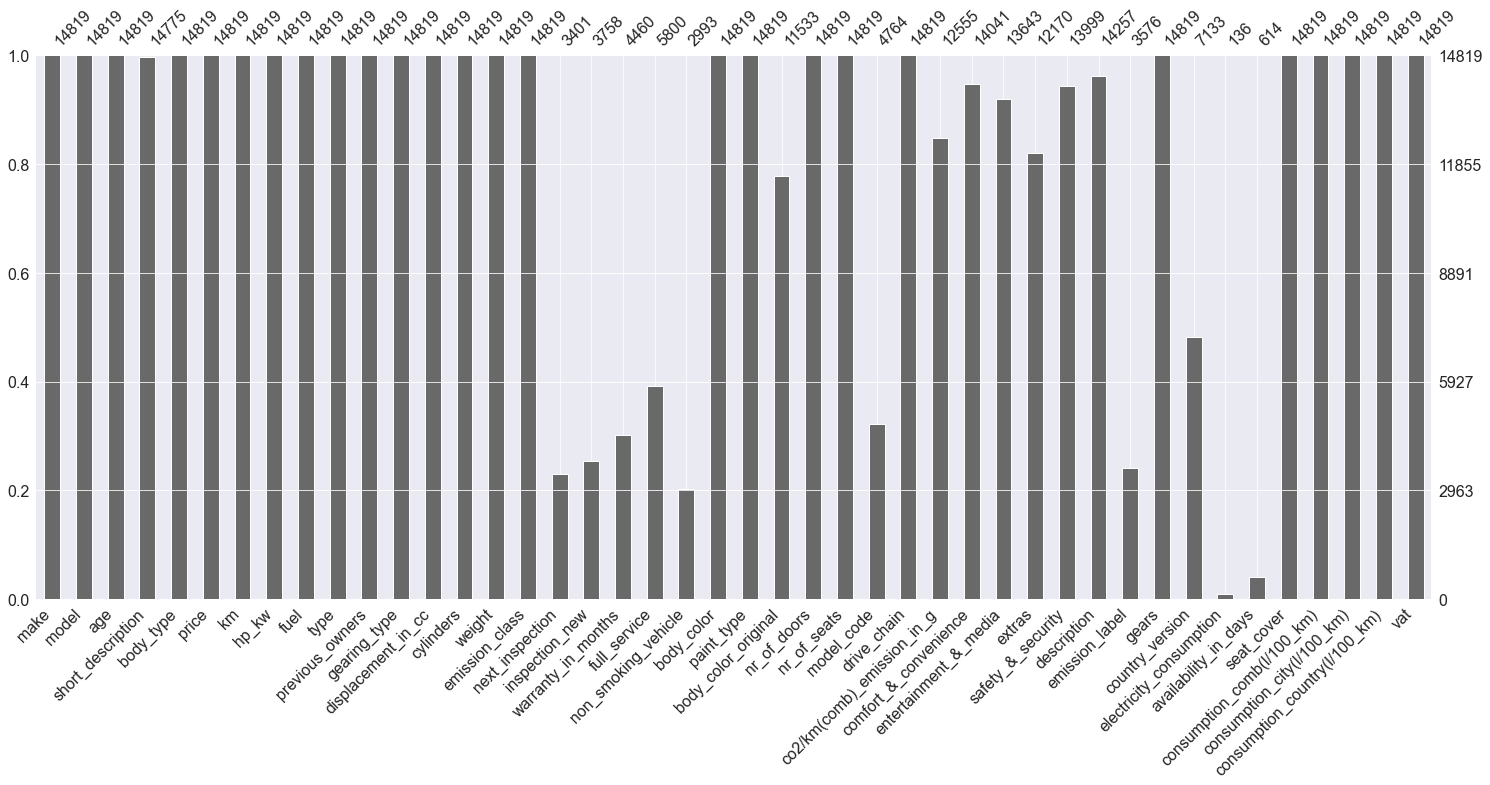

In [460]:
msno.bar(df)

In [461]:
df.drop(['next_inspection', 'inspection_new', 'warranty_in_months', 'full_service', 'non_smoking_vehicle', 'model_code','co2/km(comb)_emission_in_g', 'emission_label', 'electricity_consumption', 'country_version', 'availability_in_days', 'body_color_original'], axis=1, inplace=True)

<AxesSubplot:>

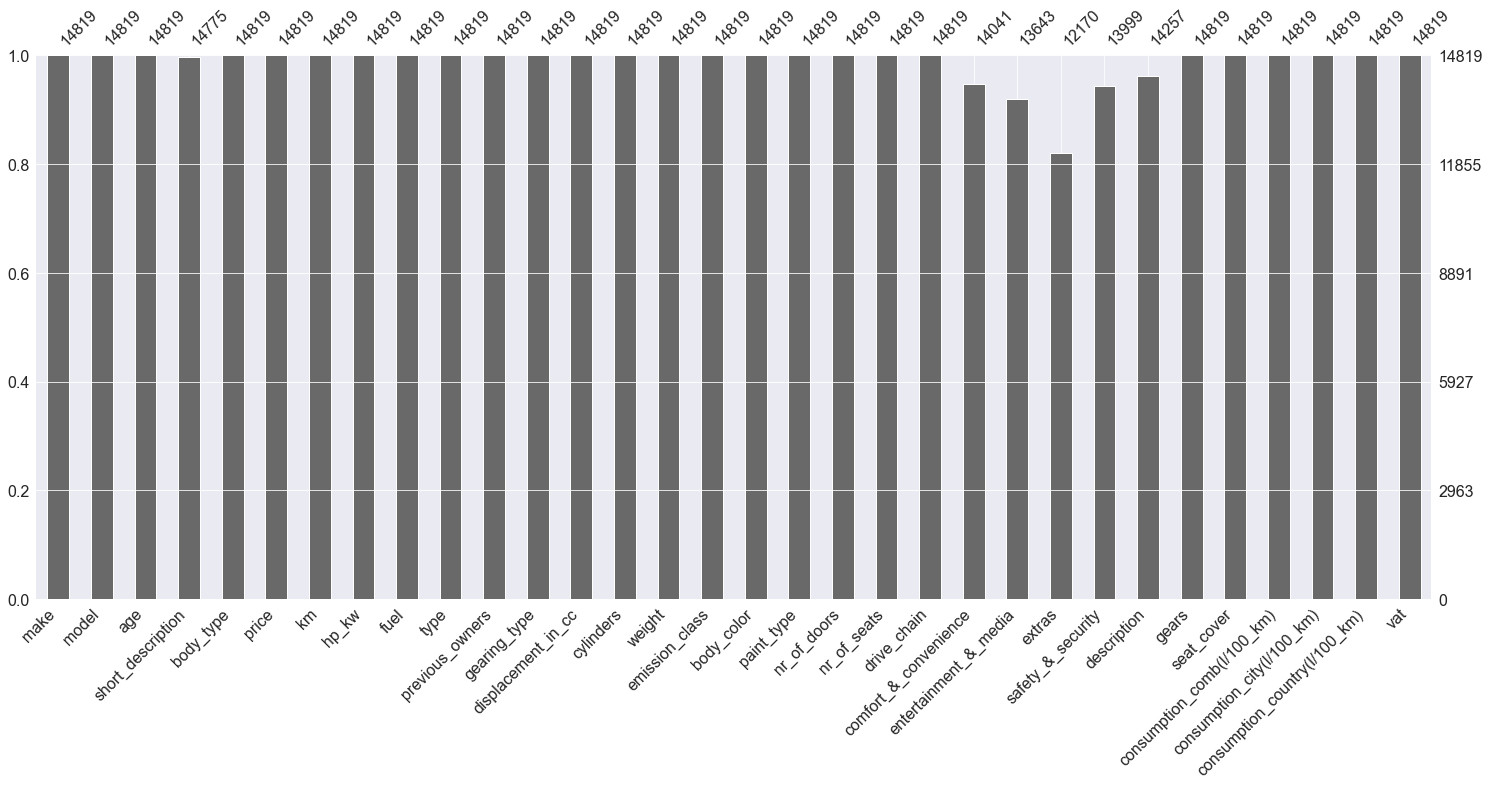

In [462]:
msno.bar(df)

In [463]:
df.head(1)

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,displacement_in_cc,cylinders,weight,emission_class,body_color,paint_type,nr_of_doors,nr_of_seats,drive_chain,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,gears,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
0,Audi,A1,4.0,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,56013.0,66.0,Diesel,Used,2.0,Automatic,1422.0,3.0,1220.0,Euro 6,Black,Metallic,5.0,5.0,front,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","'\n', 'Sicherheit:', ' ', 'Deaktivierung für B...",7.0,Cloth,3.8,4.3,3.5,VAT deductible


In [464]:
df[['description']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,15892,15893,15894,15895,15896,15897,15898,15899,15900,15901,15902,15903,15904,15905,15906,15907,15908,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
description,"'\n', 'Sicherheit:', ' ', 'Deaktivierung für B...",'\nLangstreckenfahrzeug daher die hohe Kilomet...,"'\n', 'Fahrzeug-Nummer: AM-95365', ' ', 'Ehem....","'\nAudi A1: ', '- 1e eigenaar ', '- Perfecte s...","'\n', 'Technik & Sicherheit:', 'Xenon plus', '...",'\nSichern Sie sich diesen Audi A1 1.6 TDI Spo...,"'\nREDUZIERT !!!', 'MwSt. ausweisbar', 'Nettop...","'\n', 'Ausstattungspakete:', ' Ausstattungspak...",'\nAuto in ottime condizioni. Unico proprietar...,"'\nClim automatique,Ecran multifonction couleu...","'\nautovettura ufficiale unico proprietario ',...","'\n', 'Außenausstattung', 'beheizbare Außenspi...","'\n', 'Highlights:', 'Anschlussgarantie 1 Jahr...","""\nMarque: AUDIModèle: A1Version: 1.4 TFSI 150...","'\n', ' www.nord-automobile.de', 'AUDI A1 1.0 ...","""\nNICE'S CAR SRL FA PARTE DELLA COMMUNITY DI ...","'\nDEK:[2569525]', 'Equipaggiamenti di serie:'...","'\n', 'Onze service :', 'Volledige garantie (w...",'\nPrijs is inclusief gratis 6 maanden garanti...,"'\nOFFERTA N. 4709', 'VETTURA AZIENDALE UFFICI...","'\n', 'Auto in ottime condizioni generali, int...","'\n', 'Highlights: ', 'Qualitätssiegel GW:plus...","'\nAudi A1 Sport 1.4 TFSI S-tronic 7-Gang', 'A...","""\nGARANZIA 4 ANNI APSP - CAMBIO AUT. - PEDALI...","'\n', ""VETTURA D\\' IMPORTAZIONE"", 'ACCETTIAMO...",'\nIch biete hier einen Audi A1 Sportback in w...,"'\n', 'Highlights: ', 'Qualitätssiegel GW:plus...",...,"""\nAllradlenkung. Fahrwerk einstellbar. Spurha...","'\nDEK:[2691311]', 'Renault Espace Blue dCi 20...","'\n', 'Getriebe:', ' Automatik', 'Technik:', '...","'\n', ' * 4CONTROL-Schriftzug an der B-Säule',...",'\nZwischenverkauf und Preisirrtümer sind vorb...,"'\n', 'Sicherheit:', ' ', '3. Bremsleuchte', '...","'\nDEK:[2691325]', 'Renault Espace Blue dCi 16...","'\n', '..::Renault Espace Initiale Paris Dci 2...","'\n', 'Unfallfrei', 'Euro6', 'Klimaautomatik 2...","'\nDEK:[2691300]', 'Renault Espace Blue dCi 16...","'\n12V Anschluss, 19"" Leichtmetallfelgen, ABS,...","""\nMarque: RENAULTModèle: EspaceVersion: 1.8 T...","'\n', 'Easy-Park-Assistent mit Rückfahrkamera'...","'\n', 'Fahrersitz eleektrisch', 'Adaptiver Tem...","'\nV Tce 225 EDC FAP Initiale Paris, essence, ...","'\n', 'Sonderausstattung', '3.Sitzreihe mit Ei...","""\nMarque: RENAULTModèle: EspaceVersion: 1.8 T...","'\nHallo!', 'Das Beratungsteam der Fa. Sonnlei...","'\n', 'Warum ist dieses Auto das Richtige für ...","'\n', 'Komfort:', ' ', 'abgedunkelte Scheiben ...",'\nVettura visionabile nella sede in Via Roma ...,"'\nFahrzeug-Nr.: NW9766.', 'Ausstattungslinie/...",'\nVettura visionabile nella sede in Via Roma ...,"'\nDach: Panorama-Glas-Schiebedach, Lackierung...","'\n', 'Getriebe:', ' Automatik', 'Technik:', '...","'\nDEK:[2691331]', 'Renault Espace Blue dCi 20...","'\n', 'Sicherheit Airbags:', ' ', 'Seitenairba..."


In [465]:
df.drop('description', axis=1, inplace=True)

In [466]:
df.shape

(14819, 31)

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14819 entries, 0 to 15918
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make                           14819 non-null  object 
 1   model                          14819 non-null  object 
 2   age                            14819 non-null  object 
 3   short_description              14775 non-null  object 
 4   body_type                      14819 non-null  object 
 5   price                          14819 non-null  int64  
 6   km                             14819 non-null  float64
 7   hp_kw                          14819 non-null  float64
 8   fuel                           14819 non-null  object 
 9   type                           14819 non-null  object 
 10  previous_owners                14819 non-null  float64
 11  gearing_type                   14819 non-null  object 
 12  displacement_in_cc             14819 non-null 

<AxesSubplot:>

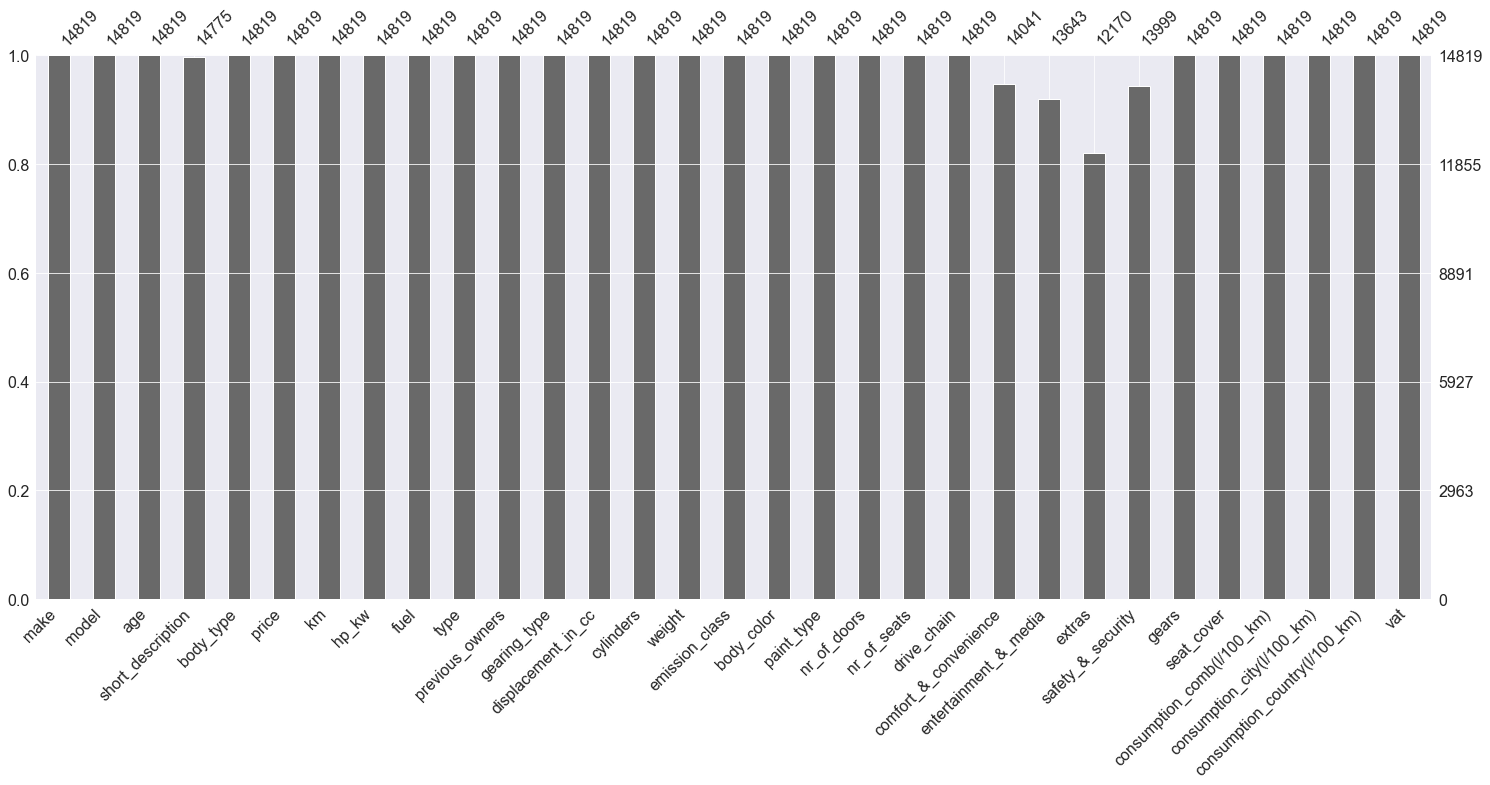

In [468]:
msno.bar(df)

<Figure size 1080x576 with 0 Axes>

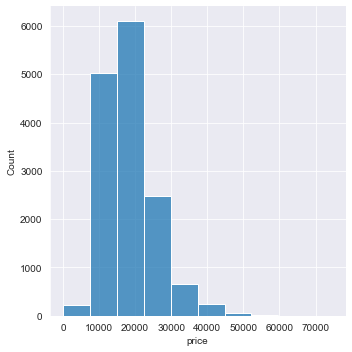

In [469]:
plt.figure(figsize = (15, 8))
sns.displot(df.price, bins = 10, kde = False);

In [470]:
df.to_csv("df_missing_values.csv", index=False)